In [4]:
import numpy as np
import sys
import os
sys.path.append(os.path.join("./", "..", ".."))

In [5]:
# Configure the data generation process and train the autoencoder

def gen(n = 400):
    
    x = np.zeros((n, 4))
    
    for i in range(n):
        
        if np.random.uniform() < 0.5:
            x[i, 0] = 1.0 + np.random.normal(loc = 0.0, scale = 0.2)
            
        if np.random.uniform() < 0.5:
            x[i, 1] = 1.0 + np.random.normal(loc = 0.0, scale = 0.2)
            
        x[i, 2] = np.random.normal(loc = 0.0, scale = 0.5)
        
        x[i, 3] = x[i, 0] + np.random.normal(loc = 0.0, scale = 0.05)
        
    return x

x = gen()

In [6]:
from Model import *
model = Model.Initialize('autoencoder', x, pretrained_path='./../../Models/best.pt')

Loading the pretrained model...


In [8]:
from sklearn.cluster import KMeans
num_clusters = 4

rep = model.Encode(x)
kmeans = KMeans(n_clusters = num_clusters).fit(rep)

In [9]:
from eldr.plotter.myplot import *

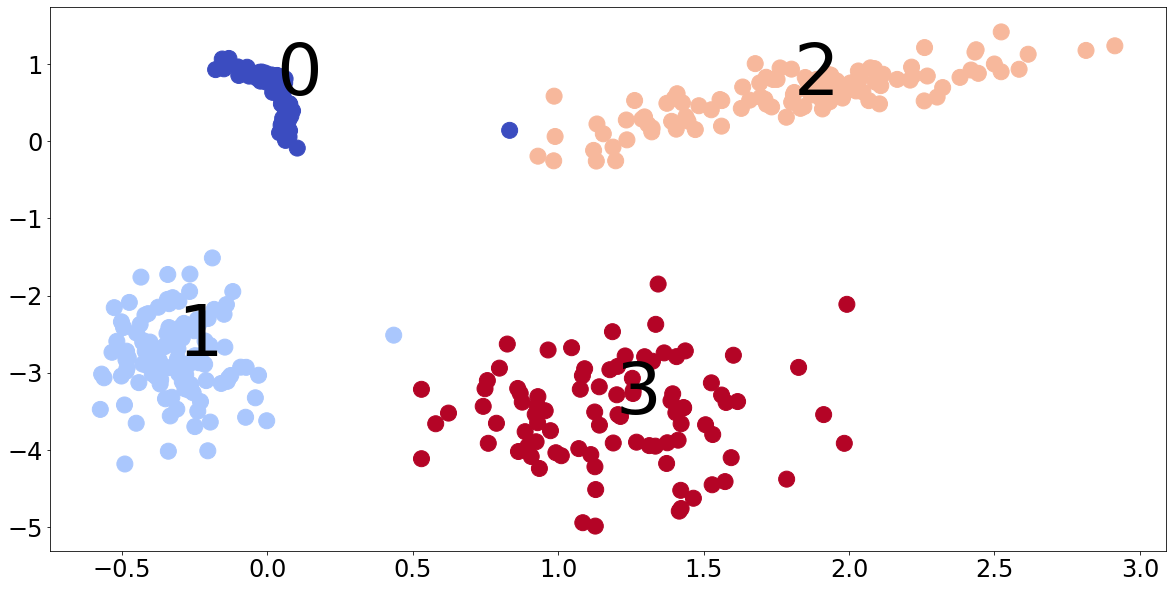

In [10]:
means, centers, indices = plot_groups(x, rep.numpy(), num_clusters, kmeans.labels_, name = "./synth-rep.png")

In [8]:
from eldr.explain.explain_cs import *

In [11]:
#find the best_epsilon
from eldr.explain.explain_cs import *
epsilon = 0

Explainer = Explain(model, means, centers, use_scaling=False)

epsilons = np.linspace(0, 2.0, num=100).tolist()
for iter_epsilon in epsilons:
    mean_, min_, max_ = Explainer.eval_epsilon(torch.tensor(x), indices, iter_epsilon)
    if mean_ >= 0.95 and min_ >= 0.95 and max_>= 0.95:
        epsilon = iter_epsilon
        break
print(epsilon)

0.32323232323232326


In [10]:
# initial_deltas = np.zeros((num_clusters - 1, means.shape[1]))
# for i in range(1, num_clusters):
#     initial_deltas[i - 1,:] = means[i,:] - means[0,:]

In [13]:
import os
import json
from types import SimpleNamespace
best_val = 0.0
ntrials = 10
lg = 1.5
config = SimpleNamespace(**json.load(open('./../../configs/tgt.json', 'r')))
for i in range(ntrials):
    print("Trial: ", i)
    Explainer = Explain(model, means, centers)
    deltas, tgt = Explainer.explain(config)
    a, b = Explainer.metrics(torch.tensor(x), indices, deltas, epsilon)
    
    val = np.mean(a)
    
    if val > best_val:
        best_val = val
        print("best_val ", best_val, "deltas ", deltas)
        np.save("deltas.npy", deltas)
    
    os.system("rm -rf explanation")

Trial:  0
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 11.558398246765137, initial 1, target 0
Retrieving the best deltas...
iter: 1, ema: 11.54946557044983, initial 1, target 0
Retrieving the best deltas...
iter: 2, ema: 11.532081457042693, initial 1, target 0
Retrieving the best deltas...
iter: 3, ema: 11.506723449173926, initial 1, target 0
Retrieving the best deltas...
iter: 4, ema: 11.473863007513607, initial 1, target 0
Retrieving the best deltas...
iter: 5, ema: 11.389345036217616, initial 0, target 2
Retrieving the best deltas...
iter: 6, ema: 11.29792722186084, initial 0, target 2
Retrieving the best deltas...
iter: 7, ema: 11.202660975450566, initial 0, target 2
Retrieving the best deltas...
iter: 8, ema: 11.10482629360591, initial 0, target 2
Retrieving the best deltas.

Retrieving the best deltas...
iter: 199, ema: 2.94330670600286, initial 0, target 2
Retrieving the best deltas...
iter: 200, ema: 2.9190846584588224, initial 1, target 3
Retrieving the best deltas...
iter: 201, ema: 2.8950269936846134, initial 1, target 3
Retrieving the best deltas...
iter: 202, ema: 2.8711385766797433, initial 1, target 3
Retrieving the best deltas...
iter: 203, ema: 2.8474232826363877, initial 1, target 3
Retrieving the best deltas...
iter: 204, ema: 2.8238841630016283, initial 1, target 3
Retrieving the best deltas...
iter: 205, ema: 2.806796387198028, initial 0, target 1
Retrieving the best deltas...
iter: 206, ema: 2.78907886287454, initial 0, target 1
Retrieving the best deltas...
iter: 207, ema: 2.7709928434041577, initial 0, target 1
Retrieving the best deltas...
iter: 208, ema: 2.752705031845765, initial 0, target 1
Retrieving the best deltas...
iter: 209, ema: 2.734323411853769, initial 0, target 1
Retrieving the best deltas...
iter: 210, ema: 2.7159191840638

Retrieving the best deltas...
iter: 345, ema: 1.3623387045793545, initial 2, target 0
Retrieving the best deltas...
iter: 346, ema: 1.3571538260441505, initial 2, target 0
Retrieving the best deltas...
iter: 347, ema: 1.3517528543425468, initial 2, target 0
Retrieving the best deltas...
iter: 348, ema: 1.346187702999248, initial 2, target 0
Retrieving the best deltas...
iter: 349, ema: 1.3397282714286212, initial 2, target 0
Retrieving the best deltas...
iter: 353, ema: 1.3393922084122118, initial 2, target 1
Retrieving the best deltas...
iter: 354, ema: 1.3386294546935682, initial 2, target 1
Retrieving the best deltas...
iter: 355, ema: 1.3308350402297167, initial 2, target 0
Retrieving the best deltas...
iter: 356, ema: 1.3228719491362344, initial 2, target 0
Retrieving the best deltas...
iter: 357, ema: 1.3148190234118475, initial 2, target 0
Retrieving the best deltas...
iter: 358, ema: 1.3067207920028405, initial 2, target 0
Retrieving the best deltas...
iter: 359, ema: 1.2985838

Retrieving the best deltas...
iter: 550, ema: 0.8286932370659817, initial 2, target 0
Retrieving the best deltas...
iter: 551, ema: 0.8242703110954303, initial 2, target 0
Retrieving the best deltas...
iter: 552, ema: 0.8198943019580172, initial 2, target 0
Retrieving the best deltas...
iter: 553, ema: 0.8155486823980623, initial 2, target 0
Retrieving the best deltas...
iter: 554, ema: 0.8112665551350482, initial 2, target 0
Retrieving the best deltas...
iter: 567, ema: 0.8093626229926516, initial 2, target 0
Retrieving the best deltas...
iter: 568, ema: 0.8051283730740273, initial 2, target 0
Retrieving the best deltas...
iter: 569, ema: 0.8009410504438653, initial 2, target 0
Retrieving the best deltas...
iter: 570, ema: 0.7968593231736414, initial 0, target 2
Retrieving the best deltas...
iter: 571, ema: 0.7927663747449522, initial 0, target 2
Retrieving the best deltas...
iter: 572, ema: 0.7887138041595624, initial 0, target 2
Retrieving the best deltas...
iter: 573, ema: 0.784682

Retrieving the best deltas...
iter: 97, ema: 6.3675485086792145, initial 0, target 2
Retrieving the best deltas...
iter: 98, ema: 6.315118907295655, initial 0, target 2
Retrieving the best deltas...
iter: 99, ema: 6.262160048106273, initial 0, target 2
Retrieving the best deltas...
iter: 100, ema: 6.220798702008297, initial 2, target 1
Retrieving the best deltas...
iter: 101, ema: 6.179565913733941, initial 2, target 1
Retrieving the best deltas...
iter: 102, ema: 6.138474664672743, initial 2, target 1
Retrieving the best deltas...
iter: 103, ema: 6.097536580928847, initial 2, target 1
Retrieving the best deltas...
iter: 104, ema: 6.0567621185352385, initial 2, target 1
Retrieving the best deltas...
iter: 105, ema: 6.015407047274736, initial 1, target 2
Retrieving the best deltas...
iter: 106, ema: 5.970876148131486, initial 1, target 2
Retrieving the best deltas...
iter: 107, ema: 5.924022092699137, initial 1, target 2
Retrieving the best deltas...
iter: 108, ema: 5.876422146296835, i

Retrieving the best deltas...
iter: 283, ema: 1.8263451942232753, initial 0, target 2
Retrieving the best deltas...
iter: 284, ema: 1.8121648410502307, initial 0, target 2
Retrieving the best deltas...
iter: 285, ema: 1.7992071435598334, initial 2, target 0
Retrieving the best deltas...
iter: 286, ema: 1.7857697077085894, initial 2, target 0
Retrieving the best deltas...
iter: 287, ema: 1.7723192710494418, initial 2, target 0
Retrieving the best deltas...
iter: 288, ema: 1.758954986276951, initial 2, target 0
Retrieving the best deltas...
iter: 289, ema: 1.7456863580140463, initial 2, target 0
Retrieving the best deltas...
iter: 290, ema: 1.7334525284581443, initial 3, target 1
Retrieving the best deltas...
iter: 291, ema: 1.7213007510144442, initial 3, target 1
Retrieving the best deltas...
iter: 292, ema: 1.709233558519139, initial 3, target 1
Retrieving the best deltas...
iter: 293, ema: 1.6972528260747786, initial 3, target 1
Retrieving the best deltas...
iter: 294, ema: 1.68535991

Retrieving the best deltas...
iter: 472, ema: 0.9390605824950239, initial 3, target 1
Retrieving the best deltas...
iter: 473, ema: 0.9336543737237922, initial 3, target 1
Retrieving the best deltas...
iter: 474, ema: 0.9282723853788196, initial 3, target 1
Retrieving the best deltas...
iter: 475, ema: 0.9271318550808633, initial 2, target 3
Retrieving the best deltas...
iter: 476, ema: 0.9259027432942758, initial 2, target 3
Retrieving the best deltas...
iter: 477, ema: 0.9246239624052174, initial 2, target 3
Retrieving the best deltas...
iter: 478, ema: 0.9233019016198951, initial 2, target 3
Retrieving the best deltas...
iter: 479, ema: 0.9219388677073033, initial 2, target 3
Retrieving the best deltas...
iter: 480, ema: 0.9205585072694804, initial 2, target 3
Retrieving the best deltas...
iter: 481, ema: 0.9191562102989355, initial 2, target 3
Retrieving the best deltas...
iter: 482, ema: 0.9177329030720829, initial 2, target 3
Retrieving the best deltas...
iter: 483, ema: 0.916313

Retrieving the best deltas...
iter: 809, ema: 0.6986627755737164, initial 3, target 1
Retrieving the best deltas...
iter: 815, ema: 0.6957452574794956, initial 3, target 1
Retrieving the best deltas...
iter: 816, ema: 0.692624826792003, initial 3, target 1
Retrieving the best deltas...
iter: 817, ema: 0.6895196469301881, initial 3, target 1
Retrieving the best deltas...
iter: 818, ema: 0.686452418104624, initial 3, target 1
Retrieving the best deltas...
iter: 819, ema: 0.6834035541022391, initial 3, target 1
Retrieving the best deltas...
iter: 820, ema: 0.680384292120787, initial 1, target 3
Retrieving the best deltas...
iter: 821, ema: 0.6773906379698733, initial 1, target 3
Retrieving the best deltas...
iter: 822, ema: 0.6744288947643269, initial 1, target 3
Retrieving the best deltas...
iter: 823, ema: 0.6714845017588948, initial 1, target 3
Retrieving the best deltas...
iter: 824, ema: 0.6685829610463826, initial 1, target 3
Retrieving the best deltas...
iter: 825, ema: 0.665727654

Retrieving the best deltas...
iter: 173, ema: 1.872827718095142, initial 3, target 2
Retrieving the best deltas...
iter: 174, ema: 1.8622094616709122, initial 3, target 2
Retrieving the best deltas...
iter: 175, ema: 1.8558326668703347, initial 3, target 0
Retrieving the best deltas...
iter: 176, ema: 1.8488117824089678, initial 3, target 0
Retrieving the best deltas...
iter: 177, ema: 1.8414165646226437, initial 3, target 0
Retrieving the best deltas...
iter: 178, ema: 1.833865049847694, initial 3, target 0
Retrieving the best deltas...
iter: 179, ema: 1.826273927425389, initial 3, target 0
Retrieving the best deltas...
iter: 180, ema: 1.8135919662730835, initial 3, target 1
Retrieving the best deltas...
iter: 181, ema: 1.8009156610064478, initial 3, target 1
Retrieving the best deltas...
iter: 182, ema: 1.7882615555562422, initial 3, target 1
Retrieving the best deltas...
iter: 183, ema: 1.775643117919114, initial 3, target 1
Retrieving the best deltas...
iter: 184, ema: 1.7630713490

Retrieving the best deltas...
iter: 310, ema: 1.1599100188642557, initial 0, target 2
Retrieving the best deltas...
iter: 311, ema: 1.1524097137319562, initial 0, target 2
Retrieving the best deltas...
iter: 312, ema: 1.1449385974348427, initial 0, target 2
Retrieving the best deltas...
iter: 313, ema: 1.1375392317379944, initial 0, target 2
Retrieving the best deltas...
iter: 314, ema: 1.1301942670553304, initial 0, target 2
Retrieving the best deltas...
iter: 315, ema: 1.1271832005349083, initial 0, target 1
Retrieving the best deltas...
iter: 316, ema: 1.1241123769686232, initial 0, target 1
Retrieving the best deltas...
iter: 317, ema: 1.1210002884333883, initial 0, target 1
Retrieving the best deltas...
iter: 318, ema: 1.1178599384640553, initial 0, target 1
Retrieving the best deltas...
iter: 319, ema: 1.1147007136884084, initial 0, target 1
Retrieving the best deltas...
iter: 320, ema: 1.1109407545575822, initial 3, target 2
Retrieving the best deltas...
iter: 321, ema: 1.107188

Retrieving the best deltas...
iter: 805, ema: 0.6941815872313281, initial 1, target 3
Retrieving the best deltas...
iter: 806, ema: 0.6911022903252128, initial 1, target 3
Retrieving the best deltas...
iter: 807, ema: 0.6880336251170632, initial 1, target 3
Retrieving the best deltas...
iter: 808, ema: 0.6849738339432164, initial 1, target 3
Retrieving the best deltas...
iter: 809, ema: 0.6819404051750505, initial 1, target 3
Retrieving the best deltas...
iter: 877, ema: 0.680265987108435, initial 0, target 2
Retrieving the best deltas...
iter: 878, ema: 0.6773044093930553, initial 0, target 2
Retrieving the best deltas...
iter: 879, ema: 0.6743599114059401, initial 0, target 2
Retrieving the best deltas...
iter: 962, ema: 0.6738637874798837, initial 0, target 2
Retrieving the best deltas...
iter: 963, ema: 0.6709374823544516, initial 0, target 2
Retrieving the best deltas...
iter: 964, ema: 0.668027188379601, initial 0, target 2
Retrieving the best deltas...
iter: 1194, ema: 0.6664651

Retrieving the best deltas...
iter: 135, ema: 6.367120991212903, initial 2, target 0
Retrieving the best deltas...
iter: 136, ema: 6.318138373257867, initial 2, target 0
Retrieving the best deltas...
iter: 137, ema: 6.268508167503804, initial 2, target 0
Retrieving the best deltas...
iter: 138, ema: 6.218551793619141, initial 2, target 0
Retrieving the best deltas...
iter: 139, ema: 6.1684136999993555, initial 2, target 0
Retrieving the best deltas...
iter: 140, ema: 6.115306689859981, initial 2, target 3
Retrieving the best deltas...
iter: 141, ema: 6.062701829648355, initial 2, target 3
Retrieving the best deltas...
iter: 142, ema: 6.010594922793484, initial 2, target 3
Retrieving the best deltas...
iter: 143, ema: 5.958981755681485, initial 2, target 3
Retrieving the best deltas...
iter: 144, ema: 5.907858106766714, initial 2, target 3
Retrieving the best deltas...
iter: 145, ema: 5.856956123055843, initial 3, target 2
Retrieving the best deltas...
iter: 146, ema: 5.806506203963766,

Retrieving the best deltas...
iter: 299, ema: 1.8548093252576199, initial 3, target 0
Retrieving the best deltas...
iter: 300, ema: 1.8436287290915687, initial 3, target 2
Retrieving the best deltas...
iter: 301, ema: 1.8325481800828567, initial 3, target 2
Retrieving the best deltas...
iter: 302, ema: 1.8215549773681412, initial 3, target 2
Retrieving the best deltas...
iter: 303, ema: 1.8106445168297656, initial 3, target 2
Retrieving the best deltas...
iter: 304, ema: 1.7998335001759485, initial 3, target 2
Retrieving the best deltas...
iter: 305, ema: 1.7860002206279664, initial 1, target 3
Retrieving the best deltas...
iter: 306, ema: 1.7722350026814828, initial 1, target 3
Retrieving the best deltas...
iter: 307, ema: 1.7585405280184947, initial 1, target 3
Retrieving the best deltas...
iter: 308, ema: 1.7449189824156246, initial 1, target 3
Retrieving the best deltas...
iter: 309, ema: 1.731418761538402, initial 1, target 3
Retrieving the best deltas...
iter: 310, ema: 1.7256728

Retrieving the best deltas...
iter: 467, ema: 0.9263570078681834, initial 1, target 3
Retrieving the best deltas...
iter: 468, ema: 0.9209508581743855, initial 1, target 3
Retrieving the best deltas...
iter: 469, ema: 0.9155817218570269, initial 1, target 3
Retrieving the best deltas...
iter: 478, ema: 0.9154625408703004, initial 0, target 1
Retrieving the best deltas...
iter: 479, ema: 0.9136786568289375, initial 0, target 1
Retrieving the best deltas...
iter: 480, ema: 0.9085208689216893, initial 3, target 1
Retrieving the best deltas...
iter: 481, ema: 0.9033533799542665, initial 3, target 1
Retrieving the best deltas...
iter: 482, ema: 0.8981939346804959, initial 3, target 1
Retrieving the best deltas...
iter: 483, ema: 0.8930769026580051, initial 3, target 1
Retrieving the best deltas...
iter: 484, ema: 0.8880161329805423, initial 3, target 1
Retrieving the best deltas...
iter: 494, ema: 0.8860065143496357, initial 1, target 0
Retrieving the best deltas...
iter: 495, ema: 0.881590

best_val  0.798581372152837 deltas  tensor([[ 9.6245e-01, -2.4569e-03,  3.4036e-04,  8.9274e-01],
        [-2.1874e-02,  9.7533e-01, -3.2726e-03, -1.8350e-03],
        [ 1.0010e+00,  9.7160e-01,  1.8227e-03,  8.5692e-01]])
Trial:  4
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 12.324761390686035, initial 0, target 1
Retrieving the best deltas...
iter: 1, ema: 12.30233115196228, initial 0, target 1
Retrieving the best deltas...
iter: 2, ema: 12.264484327411651, initial 0, target 1
Retrieving the best deltas...
iter: 3, ema: 12.213096603316307, initial 0, target 1
Retrieving the best deltas...
iter: 4, ema: 12.14968382270795, initial 0, target 1
Retrieving the best deltas...
iter: 5, ema: 12.144349284590733, initial 1, target 2
Retrieving the best deltas...
iter: 6, ema: 12.12500548

Retrieving the best deltas...
iter: 115, ema: 5.573785654171026, initial 1, target 2
Retrieving the best deltas...
iter: 116, ema: 5.528447112986524, initial 1, target 2
Retrieving the best deltas...
iter: 117, ema: 5.4835356739497065, initial 1, target 2
Retrieving the best deltas...
iter: 118, ema: 5.439047461813939, initial 1, target 2
Retrieving the best deltas...
iter: 119, ema: 5.394978604322264, initial 1, target 2
Retrieving the best deltas...
iter: 120, ema: 5.346394309192433, initial 3, target 1
Retrieving the best deltas...
iter: 121, ema: 5.298157769145209, initial 3, target 1
Retrieving the best deltas...
iter: 122, ema: 5.2503024722383635, initial 3, target 1
Retrieving the best deltas...
iter: 123, ema: 5.202847565153614, initial 3, target 1
Retrieving the best deltas...
iter: 124, ema: 5.155803887337428, initial 3, target 1
Retrieving the best deltas...
iter: 125, ema: 5.109269380973857, initial 1, target 3
Retrieving the best deltas...
iter: 126, ema: 5.063126253289988

Retrieving the best deltas...
iter: 257, ema: 1.9790938364371624, initial 2, target 0
Retrieving the best deltas...
iter: 258, ema: 1.9635941639776942, initial 2, target 0
Retrieving the best deltas...
iter: 259, ema: 1.94824605948563, initial 2, target 0
Retrieving the best deltas...
iter: 260, ema: 1.9397493571953697, initial 3, target 0
Retrieving the best deltas...
iter: 261, ema: 1.9312510342605467, initial 3, target 0
Retrieving the best deltas...
iter: 262, ema: 1.9227992972429075, initial 3, target 0
Retrieving the best deltas...
iter: 263, ema: 1.914406670519563, initial 3, target 0
Retrieving the best deltas...
iter: 264, ema: 1.9060776997158566, initial 3, target 0
Retrieving the best deltas...
iter: 265, ema: 1.8950347571436705, initial 3, target 2
Retrieving the best deltas...
iter: 266, ema: 1.8839058609977861, initial 3, target 2
Retrieving the best deltas...
iter: 267, ema: 1.87279044497547, initial 3, target 2
Retrieving the best deltas...
iter: 268, ema: 1.86171558081

Retrieving the best deltas...
iter: 435, ema: 1.015194260502396, initial 2, target 3
Retrieving the best deltas...
iter: 436, ema: 1.0128928885760828, initial 2, target 3
Retrieving the best deltas...
iter: 437, ema: 1.0105708562576665, initial 2, target 3
Retrieving the best deltas...
iter: 438, ema: 1.0082280774922625, initial 2, target 3
Retrieving the best deltas...
iter: 439, ema: 1.0058913440119566, initial 2, target 3
Retrieving the best deltas...
iter: 445, ema: 1.0022469567113477, initial 2, target 0
Retrieving the best deltas...
iter: 446, ema: 0.9961573521082425, initial 2, target 0
Retrieving the best deltas...
iter: 447, ema: 0.9900769639399624, initial 2, target 0
Retrieving the best deltas...
iter: 448, ema: 0.9840368139647548, initial 2, target 0
Retrieving the best deltas...
iter: 449, ema: 0.9780626340532377, initial 2, target 0
Retrieving the best deltas...
iter: 467, ema: 0.9748215286872173, initial 3, target 1
Retrieving the best deltas...
iter: 468, ema: 0.9690474

Retrieving the best deltas...
iter: 623, ema: 0.6713091181728531, initial 3, target 1
Retrieving the best deltas...
iter: 624, ema: 0.6684472243530706, initial 3, target 1
Retrieving the best deltas...
iter: 1270, ema: 0.66577004461387, initial 2, target 0
Retrieving the best deltas...
iter: 1271, ema: 0.6630015752535087, initial 2, target 0
Retrieving the best deltas...
iter: 1272, ema: 0.6602444112303666, initial 2, target 0
Retrieving the best deltas...
iter: 1273, ema: 0.6574949794414424, initial 2, target 0
Retrieving the best deltas...
iter: 1274, ema: 0.6547906831571217, initial 2, target 0
Retrieving the best deltas...
iter: 1287, ema: 0.6521540191516588, initial 3, target 1
Retrieving the best deltas...
iter: 1288, ema: 0.6494814760166264, initial 3, target 1
Retrieving the best deltas...
iter: 1289, ema: 0.6468319386850873, initial 3, target 1
Retrieving the best deltas...
iter: 1308, ema: 0.6448592193400474, initial 2, target 0
Retrieving the best deltas...
iter: 1309, ema: 

Retrieving the best deltas...
iter: 167, ema: 4.8125835064378535, initial 0, target 1
Retrieving the best deltas...
iter: 168, ema: 4.772807191341508, initial 0, target 1
Retrieving the best deltas...
iter: 169, ema: 4.7333770909151385, initial 0, target 1
Retrieving the best deltas...
iter: 170, ema: 4.693025458162878, initial 3, target 1
Retrieving the best deltas...
iter: 171, ema: 4.652319902601635, initial 3, target 1
Retrieving the best deltas...
iter: 172, ema: 4.611507920502192, initial 3, target 1
Retrieving the best deltas...
iter: 173, ema: 4.570757540064832, initial 3, target 1
Retrieving the best deltas...
iter: 174, ema: 4.530188028094971, initial 3, target 1
Retrieving the best deltas...
iter: 175, ema: 4.493516331749186, initial 0, target 1
Retrieving the best deltas...
iter: 176, ema: 4.457050465125496, initial 0, target 1
Retrieving the best deltas...
iter: 177, ema: 4.420835091623533, initial 0, target 1
Retrieving the best deltas...
iter: 178, ema: 4.384897628439804

Retrieving the best deltas...
iter: 339, ema: 1.584637203639632, initial 0, target 2
Retrieving the best deltas...
iter: 340, ema: 1.5768638766185705, initial 2, target 3
Retrieving the best deltas...
iter: 341, ema: 1.5691416801226636, initial 2, target 3
Retrieving the best deltas...
iter: 342, ema: 1.5614709581733124, initial 2, target 3
Retrieving the best deltas...
iter: 343, ema: 1.5538519792300833, initial 2, target 3
Retrieving the best deltas...
iter: 344, ema: 1.5462849393305131, initial 2, target 3
Retrieving the best deltas...
iter: 345, ema: 1.5378680998353937, initial 1, target 0
Retrieving the best deltas...
iter: 346, ema: 1.5294758443560292, initial 1, target 0
Retrieving the best deltas...
iter: 347, ema: 1.521137307373765, initial 1, target 0
Retrieving the best deltas...
iter: 348, ema: 1.512875468716226, initial 1, target 0
Retrieving the best deltas...
iter: 349, ema: 1.5046848526332277, initial 1, target 0
Retrieving the best deltas...
iter: 350, ema: 1.500663142

Retrieving the best deltas...
iter: 549, ema: 0.8801287583708065, initial 3, target 2
Retrieving the best deltas...
iter: 550, ema: 0.8791777678804898, initial 2, target 3
Retrieving the best deltas...
iter: 551, ema: 0.8781654883019657, initial 2, target 3
Retrieving the best deltas...
iter: 552, ema: 0.8771340006695794, initial 2, target 3
Retrieving the best deltas...
iter: 553, ema: 0.8760761197969855, initial 2, target 3
Retrieving the best deltas...
iter: 554, ema: 0.8750141418774809, initial 2, target 3
Retrieving the best deltas...
iter: 555, ema: 0.8739384388160594, initial 2, target 3
Retrieving the best deltas...
iter: 556, ema: 0.8728531246860394, initial 2, target 3
Retrieving the best deltas...
iter: 557, ema: 0.8717722526217275, initial 2, target 3
Retrieving the best deltas...
iter: 558, ema: 0.8706806356424616, initial 2, target 3
Retrieving the best deltas...
iter: 559, ema: 0.869597137587009, initial 2, target 3
Retrieving the best deltas...
iter: 580, ema: 0.8668148

Trial:  6
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 15.784539222717285, initial 1, target 2
Retrieving the best deltas...
iter: 1, ema: 15.768572978973388, initial 1, target 2
Retrieving the best deltas...
iter: 2, ema: 15.737994850349427, initial 1, target 2
Retrieving the best deltas...
iter: 3, ema: 15.695260917013169, initial 1, target 2
Retrieving the best deltas...
iter: 4, ema: 15.64103461475832, initial 1, target 2
Retrieving the best deltas...
iter: 5, ema: 15.556190325815937, initial 2, target 1
Retrieving the best deltas...
iter: 6, ema: 15.457352174579567, initial 2, target 1
Retrieving the best deltas...
iter: 7, ema: 15.34712145678885, initial 2, target 1
Retrieving the best deltas...
iter: 8, ema: 15.230626620184982, initial 2, target 1
Retrieving the best deltas

Retrieving the best deltas...
iter: 169, ema: 4.500861274563347, initial 1, target 2
Retrieving the best deltas...
iter: 170, ema: 4.467567463606043, initial 2, target 3
Retrieving the best deltas...
iter: 171, ema: 4.434084461222637, initial 2, target 3
Retrieving the best deltas...
iter: 172, ema: 4.400511087208632, initial 2, target 3
Retrieving the best deltas...
iter: 173, ema: 4.366925635951109, initial 2, target 3
Retrieving the best deltas...
iter: 174, ema: 4.333390032278671, initial 2, target 3
Retrieving the best deltas...
iter: 175, ema: 4.302165162441037, initial 0, target 3
Retrieving the best deltas...
iter: 176, ema: 4.271040090082221, initial 0, target 3
Retrieving the best deltas...
iter: 177, ema: 4.240050004399371, initial 0, target 3
Retrieving the best deltas...
iter: 178, ema: 4.209223398379272, initial 0, target 3
Retrieving the best deltas...
iter: 179, ema: 4.178583244406847, initial 0, target 3
Retrieving the best deltas...
iter: 180, ema: 4.154977276846202, 

Retrieving the best deltas...
iter: 340, ema: 1.636618411076385, initial 2, target 0
Retrieving the best deltas...
iter: 341, ema: 1.6257345942427666, initial 2, target 0
Retrieving the best deltas...
iter: 342, ema: 1.614745298732544, initial 2, target 0
Retrieving the best deltas...
iter: 343, ema: 1.6036948010445957, initial 2, target 0
Retrieving the best deltas...
iter: 344, ema: 1.5925730326444023, initial 2, target 0
Retrieving the best deltas...
iter: 345, ema: 1.5843454746488146, initial 1, target 0
Retrieving the best deltas...
iter: 346, ema: 1.5759112903080958, initial 1, target 0
Retrieving the best deltas...
iter: 347, ema: 1.5675015248772057, initial 1, target 0
Retrieving the best deltas...
iter: 348, ema: 1.5591470030881351, initial 1, target 0
Retrieving the best deltas...
iter: 349, ema: 1.5508529136238507, initial 1, target 0
Retrieving the best deltas...
iter: 350, ema: 1.543974296029551, initial 0, target 1
Retrieving the best deltas...
iter: 351, ema: 1.537056217

Retrieving the best deltas...
iter: 530, ema: 0.8969181061812641, initial 3, target 1
Retrieving the best deltas...
iter: 531, ema: 0.8918744667587795, initial 3, target 1
Retrieving the best deltas...
iter: 532, ema: 0.886840825257295, initial 3, target 1
Retrieving the best deltas...
iter: 533, ema: 0.8818337999063907, initial 3, target 1
Retrieving the best deltas...
iter: 534, ema: 0.8768843290662165, initial 3, target 1
Retrieving the best deltas...
iter: 545, ema: 0.876485446792489, initial 0, target 2
Retrieving the best deltas...
iter: 546, ema: 0.8716874805138799, initial 0, target 2
Retrieving the best deltas...
iter: 547, ema: 0.8669085889235962, initial 0, target 2
Retrieving the best deltas...
iter: 548, ema: 0.8621531437122891, initial 0, target 2
Retrieving the best deltas...
iter: 549, ema: 0.8574227697830628, initial 0, target 2
Retrieving the best deltas...
iter: 557, ema: 0.8553435712266897, initial 3, target 1
Retrieving the best deltas...
iter: 558, ema: 0.85059611

Retrieving the best deltas...
iter: 2507, ema: 0.629841321426879, initial 1, target 3
Retrieving the best deltas...
iter: 2508, ema: 0.6273249463052234, initial 1, target 3
Retrieving the best deltas...
iter: 2509, ema: 0.6248473611526265, initial 1, target 3
Retrieving the best deltas...
iter: 2510, ema: 0.6225825970552413, initial 0, target 2
Retrieving the best deltas...
iter: 2511, ema: 0.6202733145088184, initial 0, target 2
Retrieving the best deltas...
iter: 2512, ema: 0.6179428474774883, initial 0, target 2
Retrieving the best deltas...
iter: 2513, ema: 0.6156103269163982, initial 0, target 2
Retrieving the best deltas...
iter: 2514, ema: 0.6133134199525092, initial 0, target 2
Retrieving the best deltas...
iter: 3922, ema: 0.6113506745631178, initial 3, target 1
Retrieving the best deltas...
iter: 3923, ema: 0.6090623626531494, initial 3, target 1
Retrieving the best deltas...
iter: 3924, ema: 0.6067851342287778, initial 3, target 1
Trial:  7
zero
[Parameter containing:
tensor

Retrieving the best deltas...
iter: 201, ema: 1.8568061418308297, initial 3, target 1
Retrieving the best deltas...
iter: 202, ema: 1.845802518993988, initial 3, target 1
Retrieving the best deltas...
iter: 203, ema: 1.8342398201800092, initial 3, target 1
Retrieving the best deltas...
iter: 204, ema: 1.8223471291286684, initial 3, target 1
Retrieving the best deltas...
iter: 205, ema: 1.817540390387049, initial 3, target 0
Retrieving the best deltas...
iter: 206, ema: 1.811131933991037, initial 3, target 0
Retrieving the best deltas...
iter: 207, ema: 1.8042055788311193, initial 3, target 0
Retrieving the best deltas...
iter: 208, ema: 1.7970973049050671, initial 3, target 0
Retrieving the best deltas...
iter: 209, ema: 1.7899336267015975, initial 3, target 0
Retrieving the best deltas...
iter: 210, ema: 1.7787420970218009, initial 3, target 1
Retrieving the best deltas...
iter: 211, ema: 1.7674028722242972, initial 3, target 1
Retrieving the best deltas...
iter: 212, ema: 1.755955827

Retrieving the best deltas...
iter: 386, ema: 1.0277757526230085, initial 1, target 0
Retrieving the best deltas...
iter: 387, ema: 1.0244884004178996, initial 1, target 0
Retrieving the best deltas...
iter: 388, ema: 1.021213435022386, initial 1, target 0
Retrieving the best deltas...
iter: 389, ema: 1.017950960258115, initial 1, target 0
Retrieving the best deltas...
iter: 390, ema: 1.0118033192325373, initial 0, target 2
Retrieving the best deltas...
iter: 391, ema: 1.0056743197392475, initial 0, target 2
Retrieving the best deltas...
iter: 392, ema: 0.9995954796695253, initial 0, target 2
Retrieving the best deltas...
iter: 393, ema: 0.9935485075288322, initial 0, target 2
Retrieving the best deltas...
iter: 394, ema: 0.9875638930866691, initial 0, target 2
Retrieving the best deltas...
iter: 395, ema: 0.981959628202605, initial 1, target 3
Retrieving the best deltas...
iter: 396, ema: 0.976369166837838, initial 1, target 3
Retrieving the best deltas...
iter: 397, ema: 0.9707963087

Retrieving the best deltas...
iter: 952, ema: 0.6698750820598045, initial 1, target 3
Retrieving the best deltas...
iter: 953, ema: 0.6669861391358206, initial 1, target 3
Retrieving the best deltas...
iter: 954, ema: 0.6641347455999159, initial 1, target 3
Retrieving the best deltas...
iter: 989, ema: 0.6638835072850486, initial 1, target 3
Retrieving the best deltas...
iter: 990, ema: 0.6611079347463398, initial 2, target 0
Retrieving the best deltas...
iter: 991, ema: 0.6583627187816927, initial 2, target 0
Retrieving the best deltas...
iter: 992, ema: 0.6556382425996208, initial 2, target 0
Retrieving the best deltas...
iter: 993, ema: 0.6529515802749811, initial 2, target 0
Retrieving the best deltas...
iter: 994, ema: 0.6502748044023842, initial 2, target 0
Retrieving the best deltas...
iter: 1001, ema: 0.6482124965888925, initial 3, target 1
Retrieving the best deltas...
iter: 1002, ema: 0.6455829744624734, initial 3, target 1
Retrieving the best deltas...
iter: 1003, ema: 0.642

Retrieving the best deltas...
iter: 180, ema: 1.9628532395812957, initial 1, target 0
Retrieving the best deltas...
iter: 181, ema: 1.9506241750113722, initial 1, target 0
Retrieving the best deltas...
iter: 182, ema: 1.9383870463250708, initial 1, target 0
Retrieving the best deltas...
iter: 183, ema: 1.926233924992069, initial 1, target 0
Retrieving the best deltas...
iter: 184, ema: 1.9141774845038977, initial 1, target 0
Retrieving the best deltas...
iter: 185, ema: 1.9046160816347573, initial 3, target 2
Retrieving the best deltas...
iter: 186, ema: 1.8946811356945845, initial 3, target 2
Retrieving the best deltas...
iter: 187, ema: 1.8846423022762908, initial 3, target 2
Retrieving the best deltas...
iter: 188, ema: 1.8745728902904006, initial 3, target 2
Retrieving the best deltas...
iter: 189, ema: 1.8644949880400234, initial 3, target 2
Retrieving the best deltas...
iter: 190, ema: 1.851219166744485, initial 0, target 2
Retrieving the best deltas...
iter: 191, ema: 1.83733910

Retrieving the best deltas...
iter: 327, ema: 1.1266258598618917, initial 3, target 1
Retrieving the best deltas...
iter: 328, ema: 1.1200379954616904, initial 3, target 1
Retrieving the best deltas...
iter: 329, ema: 1.1134479721955728, initial 3, target 1
Retrieving the best deltas...
iter: 330, ema: 1.1068642683591992, initial 3, target 1
Retrieving the best deltas...
iter: 331, ema: 1.1002935981044057, initial 3, target 1
Retrieving the best deltas...
iter: 332, ema: 1.0937413707510626, initial 3, target 1
Retrieving the best deltas...
iter: 333, ema: 1.0872119804009432, initial 3, target 1
Retrieving the best deltas...
iter: 334, ema: 1.0807090062287241, initial 3, target 1
Retrieving the best deltas...
iter: 335, ema: 1.0770684013568286, initial 1, target 0
Retrieving the best deltas...
iter: 336, ema: 1.0732782181605591, initial 1, target 0
Retrieving the best deltas...
iter: 337, ema: 1.0694819759865448, initial 1, target 0
Retrieving the best deltas...
iter: 338, ema: 1.065699

Retrieving the best deltas...
iter: 705, ema: 0.7455570819288649, initial 1, target 0
Retrieving the best deltas...
iter: 706, ema: 0.7447917951233245, initial 1, target 0
Retrieving the best deltas...
iter: 707, ema: 0.7440412648674037, initial 1, target 0
Retrieving the best deltas...
iter: 708, ema: 0.7432824500475947, initial 1, target 0
Retrieving the best deltas...
iter: 709, ema: 0.7425230819775539, initial 1, target 0
Retrieving the best deltas...
iter: 719, ema: 0.7401199591432691, initial 2, target 0
Retrieving the best deltas...
iter: 754, ema: 0.7366515545228358, initial 1, target 3
Retrieving the best deltas...
iter: 795, ema: 0.7337536864014838, initial 1, target 3
Retrieving the best deltas...
iter: 796, ema: 0.7302390451239595, initial 1, target 3
Retrieving the best deltas...
iter: 797, ema: 0.7267616364217777, initial 1, target 3
Retrieving the best deltas...
iter: 798, ema: 0.7233049106725463, initial 1, target 3
Retrieving the best deltas...
iter: 799, ema: 0.719884

Retrieving the best deltas...
iter: 149, ema: 5.478436272447961, initial 1, target 2
Retrieving the best deltas...
iter: 150, ema: 5.428504744663439, initial 3, target 1
Retrieving the best deltas...
iter: 151, ema: 5.3789987317717625, initial 3, target 1
Retrieving the best deltas...
iter: 152, ema: 5.329923160123486, initial 3, target 1
Retrieving the best deltas...
iter: 153, ema: 5.281281230126999, initial 3, target 1
Retrieving the best deltas...
iter: 154, ema: 5.233074805440933, initial 3, target 1
Retrieving the best deltas...
iter: 155, ema: 5.185304686515933, initial 3, target 1
Retrieving the best deltas...
iter: 156, ema: 5.137970809875441, initial 3, target 1
Retrieving the best deltas...
iter: 157, ema: 5.091072405170527, initial 3, target 1
Retrieving the best deltas...
iter: 158, ema: 5.04460812056384, initial 3, target 1
Retrieving the best deltas...
iter: 159, ema: 4.998576127488199, initial 3, target 1
Retrieving the best deltas...
iter: 160, ema: 4.952973221509452, 

Retrieving the best deltas...
iter: 309, ema: 1.7995869456609659, initial 2, target 3
Retrieving the best deltas...
iter: 310, ema: 1.7906648200245467, initial 2, target 0
Retrieving the best deltas...
iter: 311, ema: 1.781605918077315, initial 2, target 0
Retrieving the best deltas...
iter: 312, ema: 1.7724339485953333, initial 2, target 0
Retrieving the best deltas...
iter: 313, ema: 1.7631663512768527, initial 2, target 0
Retrieving the best deltas...
iter: 314, ema: 1.7538177795476078, initial 2, target 0
Retrieving the best deltas...
iter: 315, ema: 1.7481765267246658, initial 0, target 3
Retrieving the best deltas...
iter: 316, ema: 1.7424949421310183, initial 0, target 3
Retrieving the best deltas...
iter: 317, ema: 1.73678883807714, initial 0, target 3
Retrieving the best deltas...
iter: 318, ema: 1.7310712330330078, initial 0, target 3
Retrieving the best deltas...
iter: 319, ema: 1.725369703060466, initial 0, target 3
Retrieving the best deltas...
iter: 320, ema: 1.7200989810

Retrieving the best deltas...
iter: 502, ema: 0.9554998552300801, initial 0, target 1
Retrieving the best deltas...
iter: 503, ema: 0.9535529485089865, initial 0, target 1
Retrieving the best deltas...
iter: 504, ema: 0.9515924845174804, initial 0, target 1
Retrieving the best deltas...
iter: 511, ema: 0.9510951298410386, initial 2, target 0
Retrieving the best deltas...
iter: 512, ema: 0.9462231755609655, initial 2, target 0
Retrieving the best deltas...
iter: 513, ema: 0.9413686769954155, initial 2, target 0
Retrieving the best deltas...
iter: 514, ema: 0.9365324075991186, initial 2, target 0
Retrieving the best deltas...
iter: 522, ema: 0.9344942939266345, initial 1, target 0
Retrieving the best deltas...
iter: 523, ema: 0.9319113107785516, initial 1, target 0
Retrieving the best deltas...
iter: 524, ema: 0.9293546986721241, initial 1, target 0
Retrieving the best deltas...
iter: 531, ema: 0.9280101840025944, initial 3, target 1
Retrieving the best deltas...
iter: 532, ema: 0.922673

Retrieving the best deltas...
iter: 2060, ema: 0.6634698487733566, initial 3, target 1
Retrieving the best deltas...
iter: 2061, ema: 0.6606639509042715, initial 3, target 1
Retrieving the best deltas...
iter: 2062, ema: 0.6578705438767085, initial 3, target 1
Retrieving the best deltas...
iter: 2063, ema: 0.6551124878233937, initial 3, target 1
Retrieving the best deltas...
iter: 2064, ema: 0.6523671457401121, initial 3, target 1
Retrieving the best deltas...
iter: 2083, ema: 0.6515311446578566, initial 3, target 1
Retrieving the best deltas...
iter: 2084, ema: 0.6488563577655306, initial 3, target 1
Retrieving the best deltas...
iter: 3267, ema: 0.646268125897191, initial 3, target 1
Retrieving the best deltas...
iter: 3268, ema: 0.643617741624799, initial 3, target 1
Retrieving the best deltas...
iter: 3269, ema: 0.641002826925798, initial 3, target 1
Retrieving the best deltas...
iter: 3277, ema: 0.639054050728527, initial 2, target 0
Retrieving the best deltas...
iter: 3278, ema: 

In [14]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
deltas = np.load("deltas.npy")
print(deltas)

[[0.962455 -0.002457 0.000340 0.892745]
 [-0.021874 0.975331 -0.003273 -0.001835]
 [1.000996 0.971596 0.001823 0.856915]]


./../../eldr/plotter/myplot.py:106: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)
/home2/tirthankar/miniconda3_1/envs/rajeev3/lib/python3.7/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


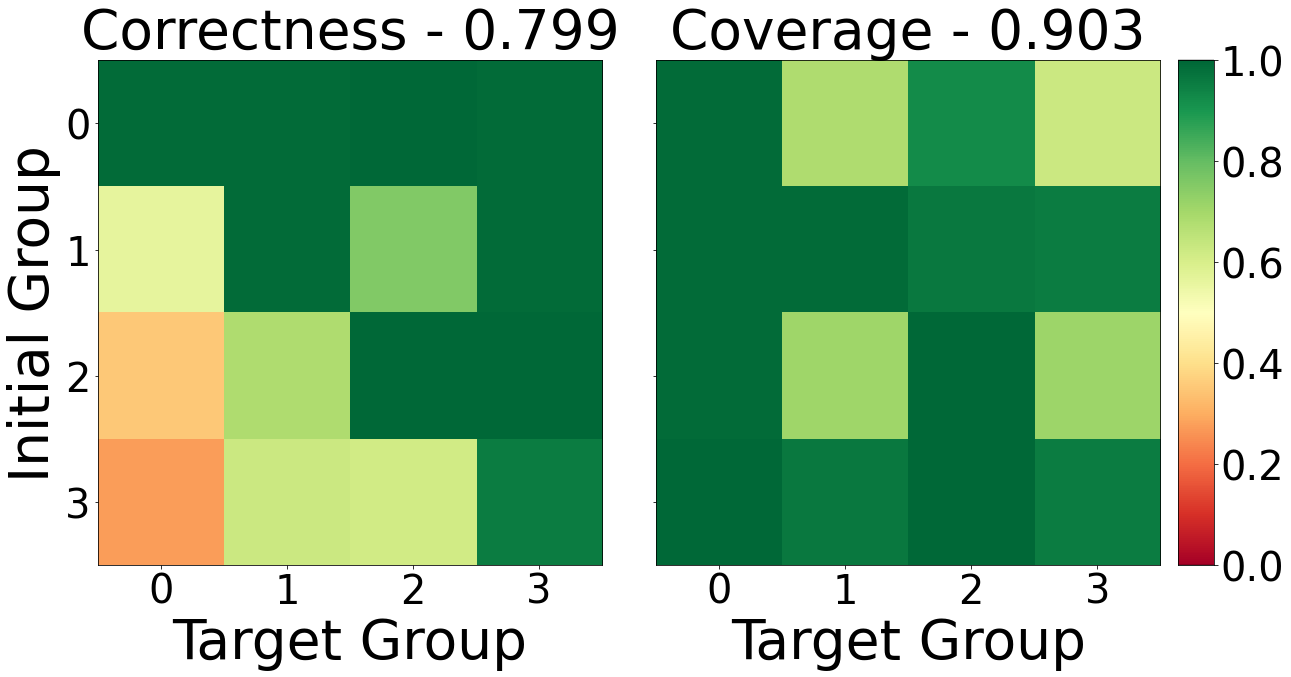

In [15]:
# Evaluate the explanations
deltas = np.load("deltas.npy")

a, b = Explainer.metrics(torch.tensor(x), indices, torch.from_numpy(deltas), epsilon)

plot_metrics(a, b, name = "synth-metrics-ours.png")

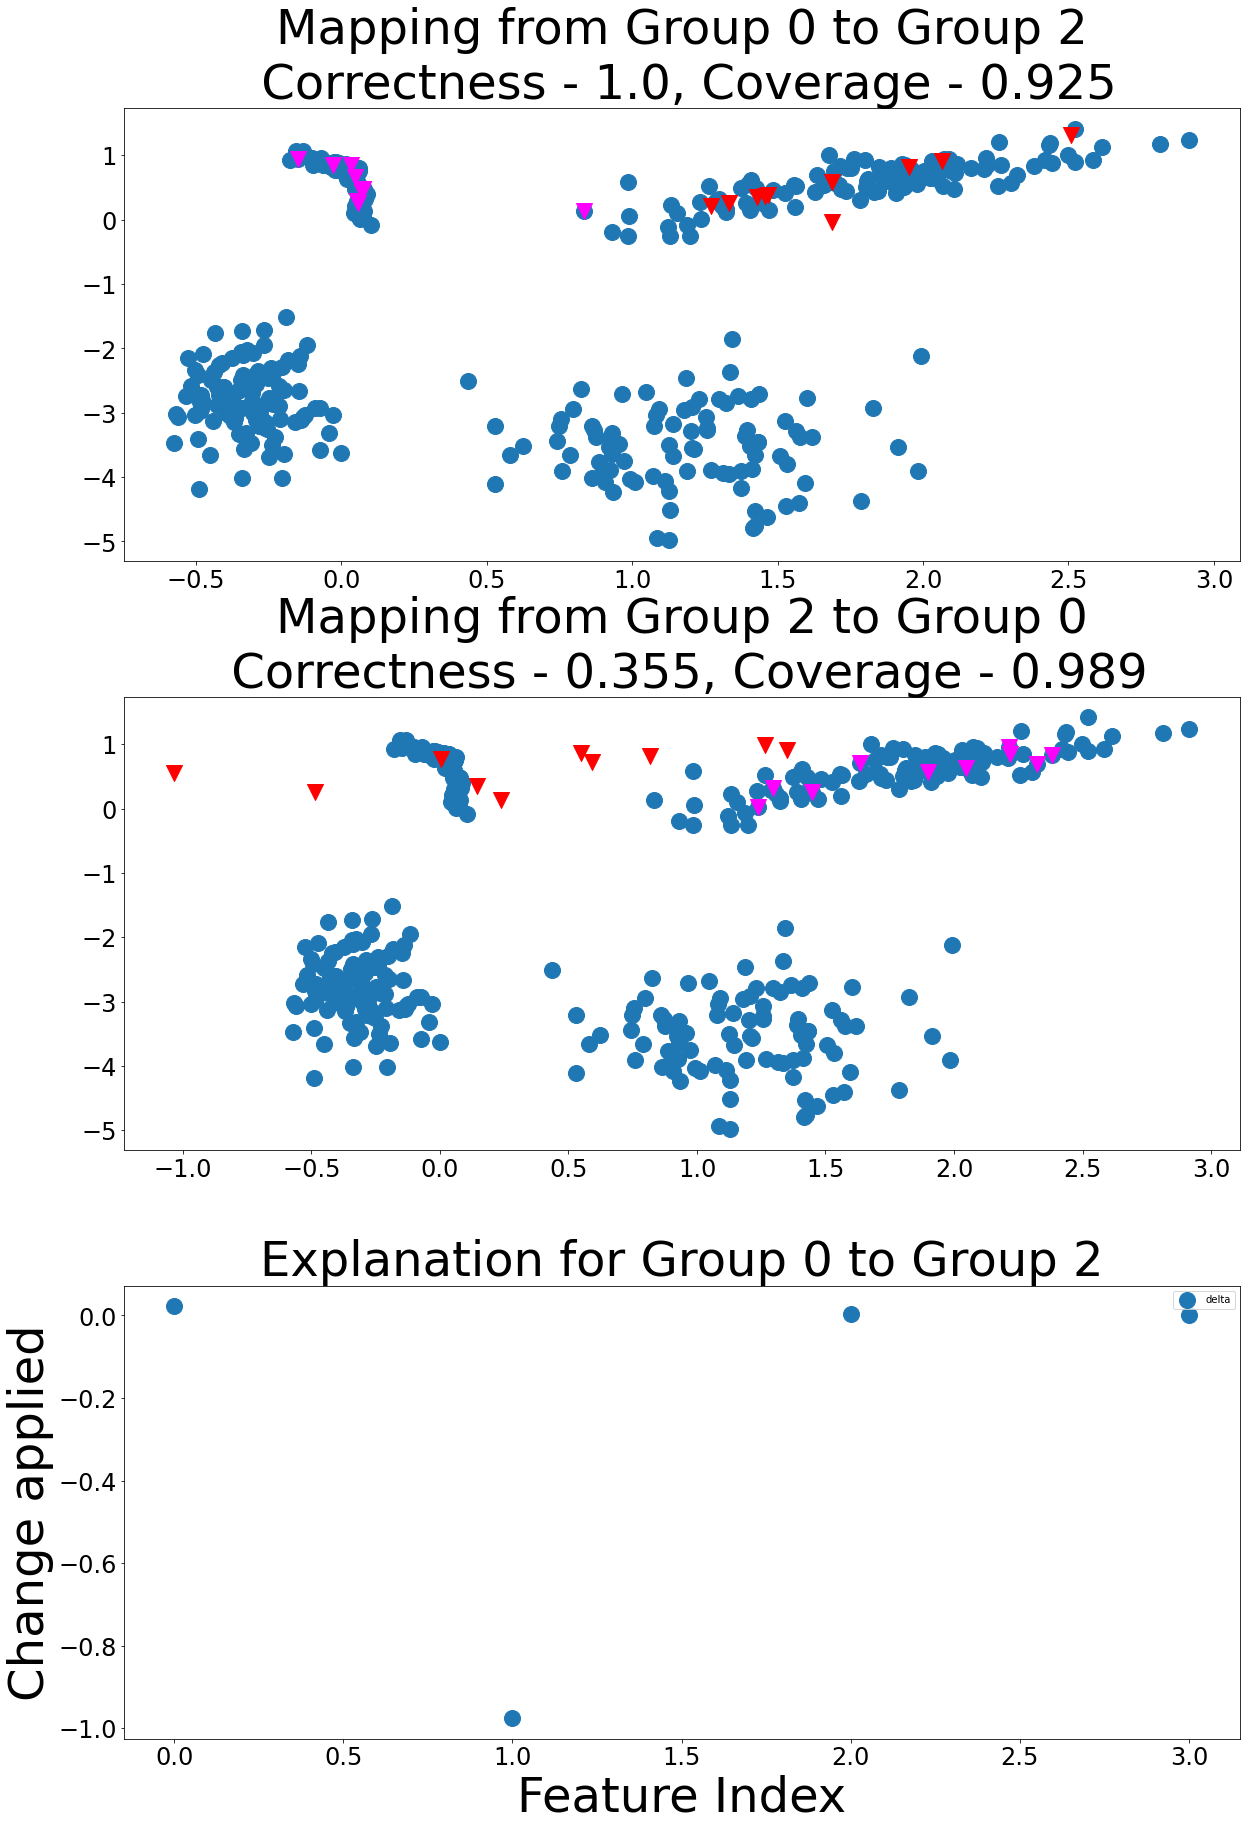

In [16]:
plot_explanation(model, x, rep, indices, deltas, a, b, 0, 2, num_points = 10, name = "tst_synthetic.png")

### Experiments with Scaling ON

In [18]:
import os
import json
from types import SimpleNamespace
best_val = 0.0
ntrials = 10
lg = 1.5
config = SimpleNamespace(**json.load(open('./../../configs/tgt.json', 'r')))
for i in range(ntrials):
    print("Trial: ", i)
    Explainer = Explain(model, means, centers, use_scaling=True)
    gamma, deltas_with_scaling, tgt = Explainer.explain(config)
    a, b = Explainer.metrics(torch.tensor(x), indices, deltas_with_scaling, epsilon, logit_gammas=gamma)
    
    val = np.mean(a)
    
    if val > best_val:
        best_val = val
        print("best_val ", best_val, "deltas ", deltas_with_scaling, "gamma ", gamma)
        np.save("deltas_with_scaling.npy", deltas_with_scaling)
        np.save("gamma.npy", gamma)
    
    os.system("rm -rf explanation")

Trial:  0
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 12.324761390686035, initial 0, target 1
Retrieving the best deltas...
iter: 1, ema: 12.302333221435546, initial 0, target 1
Retrieving the best deltas...
iter: 2, ema: 12.264514175796508, initial 0, target 1
Retrieving the best deltas...
iter: 3, ema: 12.213132237659453, initial 0, target 1
Retrieving the best deltas...
iter: 4, ema: 12.149747911208761, initial 0, target 1
Retrieving the best deltas...
iter: 5, ema: 12.072665519796564, initial 1, target 3
Retrieving the best deltas...
iter: 6, ema: 11.984953662762965, initial 

Retrieving the best deltas...
iter: 111, ema: 5.562825953459877, initial 3, target 2
Retrieving the best deltas...
iter: 112, ema: 5.516747916083711, initial 3, target 2
Retrieving the best deltas...
iter: 113, ema: 5.470997466542091, initial 3, target 2
Retrieving the best deltas...
iter: 114, ema: 5.425603595931121, initial 3, target 2
Retrieving the best deltas...
iter: 115, ema: 5.393203419728279, initial 2, target 1
Retrieving the best deltas...
iter: 116, ema: 5.360640902380514, initial 2, target 1
Retrieving the best deltas...
iter: 117, ema: 5.327983246713643, initial 2, target 1
Retrieving the best deltas...
iter: 118, ema: 5.295273873612351, initial 2, target 1
Retrieving the best deltas...
iter: 119, ema: 5.262576876949287, initial 2, target 1
Retrieving the best deltas...
iter: 120, ema: 5.2186142153365465, initial 1, target 0
Retrieving the best deltas...
iter: 121, ema: 5.174461593762519, initial 1, target 0
Retrieving the best deltas...
iter: 122, ema: 5.130481274356571,

Retrieving the best deltas...
iter: 226, ema: 2.51659625289695, initial 3, target 2
Retrieving the best deltas...
iter: 227, ema: 2.5001085394886924, initial 3, target 2
Retrieving the best deltas...
iter: 228, ema: 2.483753398093096, initial 3, target 2
Retrieving the best deltas...
iter: 229, ema: 2.4675198690912987, initial 3, target 2
Retrieving the best deltas...
iter: 230, ema: 2.45473707495666, initial 2, target 3
Retrieving the best deltas...
iter: 231, ema: 2.441680254248292, initial 2, target 3
Retrieving the best deltas...
iter: 232, ema: 2.4284367667540265, initial 2, target 3
Retrieving the best deltas...
iter: 233, ema: 2.4150688848729245, initial 2, target 3
Retrieving the best deltas...
iter: 234, ema: 2.4016256828921, initial 2, target 3
Retrieving the best deltas...
iter: 235, ema: 2.38814488081324, initial 2, target 3
Retrieving the best deltas...
iter: 236, ema: 2.3746527027875786, initial 2, target 3
Retrieving the best deltas...
iter: 237, ema: 2.3611732415231765,

Retrieving the best deltas...
iter: 458, ema: 1.075455184598152, initial 2, target 3
Retrieving the best deltas...
iter: 459, ema: 1.0742857725036048, initial 2, target 3
Retrieving the best deltas...
iter: 460, ema: 1.0730335251396679, initial 2, target 3
Retrieving the best deltas...
iter: 461, ema: 1.0717367842343175, initial 2, target 3
Retrieving the best deltas...
iter: 462, ema: 1.0703641068340597, initial 2, target 3
Retrieving the best deltas...
iter: 463, ema: 1.068950736571078, initial 2, target 3
Retrieving the best deltas...
iter: 464, ema: 1.0674652830841513, initial 2, target 3
Retrieving the best deltas...
iter: 465, ema: 1.0610194832405992, initial 3, target 1
Retrieving the best deltas...
iter: 466, ema: 1.0545759621280761, initial 3, target 1
Retrieving the best deltas...
iter: 467, ema: 1.048148562787786, initial 3, target 1
Retrieving the best deltas...
iter: 468, ema: 1.0417553880572585, initial 3, target 1
Retrieving the best deltas...
iter: 469, ema: 1.035399610

Retrieving the best deltas...
iter: 1829, ema: 0.6158350725268366, initial 3, target 1
Retrieving the best deltas...
iter: 1837, ema: 0.6138300635328997, initial 3, target 1
Retrieving the best deltas...
iter: 1838, ema: 0.6115101568432646, initial 3, target 1
Retrieving the best deltas...
iter: 1839, ema: 0.609217690389025, initial 3, target 1
best_val  0.26258192361275456 deltas  tensor([[ 0.0034,  0.0037, -0.0042,  0.0013],
        [-0.0025,  0.0180, -0.0012,  0.0001],
        [ 0.0034,  0.0153, -0.0012,  0.0037]]) gamma  tensor([[ 9.8418e-01, -1.0707e-03,  7.3963e-04,  8.5486e-01],
        [-3.6265e-02,  9.7255e-01, -9.9704e-04,  4.3195e-03],
        [ 9.8765e-01,  9.8508e-01,  2.9815e-03,  8.5791e-01]])
Trial:  1
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=T

Retrieving the best deltas...
iter: 97, ema: 8.379664235356877, initial 1, target 3
Retrieving the best deltas...
iter: 98, ema: 8.305964587641752, initial 1, target 3
Retrieving the best deltas...
iter: 99, ema: 8.231936229197052, initial 1, target 3
Retrieving the best deltas...
iter: 100, ema: 8.156635291177619, initial 0, target 2
Retrieving the best deltas...
iter: 101, ema: 8.080651949177783, initial 0, target 2
Retrieving the best deltas...
iter: 102, ema: 8.004884539273675, initial 0, target 2
Retrieving the best deltas...
iter: 103, ema: 7.929723640128993, initial 0, target 2
Retrieving the best deltas...
iter: 104, ema: 7.855240706947021, initial 0, target 2
Retrieving the best deltas...
iter: 105, ema: 7.787962448103335, initial 2, target 0
Retrieving the best deltas...
iter: 106, ema: 7.719843768465594, initial 2, target 0
Retrieving the best deltas...
iter: 107, ema: 7.651886409872964, initial 2, target 0
Retrieving the best deltas...
iter: 108, ema: 7.584228752544178, ini

Retrieving the best deltas...
iter: 229, ema: 3.0687799987741764, initial 2, target 3
Retrieving the best deltas...
iter: 230, ema: 3.0515464822623106, initial 2, target 1
Retrieving the best deltas...
iter: 231, ema: 3.0341557158401846, initial 2, target 1
Retrieving the best deltas...
iter: 232, ema: 3.0166337468661393, initial 2, target 1
Retrieving the best deltas...
iter: 233, ema: 2.9991346588386247, initial 2, target 1
Retrieving the best deltas...
iter: 234, ema: 2.9816933563099917, initial 2, target 1
Retrieving the best deltas...
iter: 235, ema: 2.9593529653389403, initial 3, target 1
Retrieving the best deltas...
iter: 236, ema: 2.93692838791219, initial 3, target 1
Retrieving the best deltas...
iter: 237, ema: 2.9145253289418966, initial 3, target 1
Retrieving the best deltas...
iter: 238, ema: 2.892200052816746, initial 3, target 1
Retrieving the best deltas...
iter: 239, ema: 2.8700096935811508, initial 3, target 1
Retrieving the best deltas...
iter: 240, ema: 2.847988114

Retrieving the best deltas...
iter: 359, ema: 1.5354645393459487, initial 2, target 1
Retrieving the best deltas...
iter: 360, ema: 1.532088462983251, initial 2, target 1
Retrieving the best deltas...
iter: 361, ema: 1.5287181546588078, initial 2, target 1
Retrieving the best deltas...
iter: 362, ema: 1.5253543446656408, initial 2, target 1
Retrieving the best deltas...
iter: 363, ema: 1.521999364127157, initial 2, target 1
Retrieving the best deltas...
iter: 364, ema: 1.5186532356134488, initial 2, target 1
Retrieving the best deltas...
iter: 365, ema: 1.5091369330499094, initial 0, target 2
Retrieving the best deltas...
iter: 366, ema: 1.4996437493778652, initial 0, target 2
Retrieving the best deltas...
iter: 367, ema: 1.4901900747596433, initial 0, target 2
Retrieving the best deltas...
iter: 368, ema: 1.4807554356840669, initial 0, target 2
Retrieving the best deltas...
iter: 369, ema: 1.4713789248328948, initial 0, target 2
Retrieving the best deltas...
iter: 370, ema: 1.46870833

Retrieving the best deltas...
iter: 504, ema: 1.0690903501475577, initial 0, target 2
Retrieving the best deltas...
iter: 505, ema: 1.0631712407268166, initial 3, target 1
Retrieving the best deltas...
iter: 506, ema: 1.0570155415031421, initial 3, target 1
Retrieving the best deltas...
iter: 507, ema: 1.0507826941969172, initial 3, target 1
Retrieving the best deltas...
iter: 508, ema: 1.0445290855948681, initial 3, target 1
Retrieving the best deltas...
iter: 509, ema: 1.0382894063850947, initial 3, target 1
Retrieving the best deltas...
iter: 517, ema: 1.0340767042820864, initial 1, target 3
Retrieving the best deltas...
iter: 518, ema: 1.0289359817520143, initial 1, target 3
Retrieving the best deltas...
iter: 519, ema: 1.0237592252412644, initial 1, target 3
Retrieving the best deltas...
iter: 520, ema: 1.0185652701453383, initial 1, target 3
Retrieving the best deltas...
iter: 521, ema: 1.0133268241198912, initial 1, target 3
Retrieving the best deltas...
iter: 522, ema: 1.008114

Retrieving the best deltas...
iter: 1434, ema: 0.7312680515878518, initial 3, target 1
Retrieving the best deltas...
iter: 1444, ema: 0.7306751246381809, initial 2, target 0
Retrieving the best deltas...
iter: 1454, ema: 0.7294735542604001, initial 2, target 0
Retrieving the best deltas...
iter: 1455, ema: 0.7292605347784346, initial 1, target 0
Retrieving the best deltas...
iter: 1456, ema: 0.728970056601213, initial 1, target 0
Retrieving the best deltas...
iter: 1457, ema: 0.7286075917577427, initial 1, target 0
Retrieving the best deltas...
iter: 1458, ema: 0.7281891624151393, initial 1, target 0
Retrieving the best deltas...
iter: 1459, ema: 0.7277432678956327, initial 1, target 0
Retrieving the best deltas...
iter: 1544, ema: 0.7244588796682191, initial 0, target 2
Retrieving the best deltas...
iter: 1564, ema: 0.7242157585702789, initial 0, target 2
Retrieving the best deltas...
iter: 2001, ema: 0.7239583697970032, initial 3, target 1
Retrieving the best deltas...
iter: 2002, em

Retrieving the best deltas...
iter: 111, ema: 6.999788885028168, initial 1, target 2
Retrieving the best deltas...
iter: 112, ema: 6.9411919890482165, initial 1, target 2
Retrieving the best deltas...
iter: 113, ema: 6.883032621428623, initial 1, target 2
Retrieving the best deltas...
iter: 114, ema: 6.825370046765012, initial 1, target 2
Retrieving the best deltas...
iter: 115, ema: 6.788510055480101, initial 0, target 3
Retrieving the best deltas...
iter: 116, ema: 6.749231531844855, initial 0, target 3
Retrieving the best deltas...
iter: 117, ema: 6.708037167271036, initial 0, target 3
Retrieving the best deltas...
iter: 118, ema: 6.665369615937529, initial 0, target 3
Retrieving the best deltas...
iter: 119, ema: 6.621568025872514, initial 0, target 3
Retrieving the best deltas...
iter: 120, ema: 6.5689070545714605, initial 0, target 1
Retrieving the best deltas...
iter: 121, ema: 6.515797773187428, initial 0, target 1
Retrieving the best deltas...
iter: 122, ema: 6.462485047969439

Retrieving the best deltas...
iter: 233, ema: 2.868127896406297, initial 1, target 3
Retrieving the best deltas...
iter: 234, ema: 2.8497179401694375, initial 1, target 3
Retrieving the best deltas...
iter: 235, ema: 2.833861068909451, initial 1, target 2
Retrieving the best deltas...
iter: 236, ema: 2.8172718461998643, initial 1, target 2
Retrieving the best deltas...
iter: 237, ema: 2.800635172812328, initial 1, target 2
Retrieving the best deltas...
iter: 238, ema: 2.784092512080375, initial 1, target 2
Retrieving the best deltas...
iter: 239, ema: 2.7676627936818305, initial 1, target 2
Retrieving the best deltas...
iter: 240, ema: 2.759483629448168, initial 2, target 1
Retrieving the best deltas...
iter: 241, ema: 2.75123189155571, initial 2, target 1
Retrieving the best deltas...
iter: 242, ema: 2.7429042955405434, initial 2, target 1
Retrieving the best deltas...
iter: 243, ema: 2.7345258233115324, initial 2, target 1
Retrieving the best deltas...
iter: 244, ema: 2.7260751266075

Retrieving the best deltas...
iter: 367, ema: 1.5369957151554468, initial 3, target 0
Retrieving the best deltas...
iter: 368, ema: 1.532850594114961, initial 3, target 0
Retrieving the best deltas...
iter: 369, ema: 1.5287014900483535, initial 3, target 0
Retrieving the best deltas...
iter: 370, ema: 1.5233979503561526, initial 2, target 3
Retrieving the best deltas...
iter: 371, ema: 1.5180492676741852, initial 2, target 3
Retrieving the best deltas...
iter: 372, ema: 1.5126439629666513, initial 2, target 3
Retrieving the best deltas...
iter: 373, ema: 1.507219533491709, initial 2, target 3
Retrieving the best deltas...
iter: 374, ema: 1.5017534176159821, initial 2, target 3
Retrieving the best deltas...
iter: 375, ema: 1.4962765003097487, initial 2, target 3
Retrieving the best deltas...
iter: 376, ema: 1.4907775283459732, initial 2, target 3
Retrieving the best deltas...
iter: 377, ema: 1.4852743974325926, initial 2, target 3
Retrieving the best deltas...
iter: 378, ema: 1.47976196

Retrieving the best deltas...
iter: 552, ema: 1.0318218594668536, initial 1, target 3
Retrieving the best deltas...
iter: 553, ema: 1.0272039429962083, initial 1, target 3
Retrieving the best deltas...
iter: 554, ema: 1.022556479777222, initial 1, target 3
Retrieving the best deltas...
iter: 555, ema: 1.0207680358939089, initial 0, target 1
Retrieving the best deltas...
iter: 556, ema: 1.0188170156387677, initial 0, target 1
Retrieving the best deltas...
iter: 557, ema: 1.0168311056189843, initial 0, target 1
Retrieving the best deltas...
iter: 558, ema: 1.0148133715119139, initial 0, target 1
Retrieving the best deltas...
iter: 559, ema: 1.0127699203615301, initial 0, target 1
Retrieving the best deltas...
iter: 560, ema: 1.0083744356087512, initial 1, target 3
Retrieving the best deltas...
iter: 561, ema: 1.0039370100459606, initial 1, target 3
Retrieving the best deltas...
iter: 562, ema: 0.9994601468596398, initial 1, target 3
Retrieving the best deltas...
iter: 563, ema: 0.9949727

Retrieving the best deltas...
iter: 1246, ema: 0.709085321896746, initial 2, target 0
Retrieving the best deltas...
iter: 1247, ema: 0.7058906118161872, initial 2, target 0
Retrieving the best deltas...
iter: 1248, ema: 0.7027360528197408, initial 2, target 0
Retrieving the best deltas...
iter: 1249, ema: 0.6995905490906691, initial 2, target 0
Retrieving the best deltas...
iter: 1250, ema: 0.6964832777450223, initial 2, target 0
Retrieving the best deltas...
iter: 1251, ema: 0.6934080286148232, initial 2, target 0
Retrieving the best deltas...
iter: 1252, ema: 0.6903662529279601, initial 2, target 0
Retrieving the best deltas...
iter: 1253, ema: 0.6873425294183604, initial 2, target 0
Retrieving the best deltas...
iter: 1254, ema: 0.6843691099415902, initial 2, target 0
Retrieving the best deltas...
iter: 1293, ema: 0.6821030361882193, initial 3, target 1
Retrieving the best deltas...
iter: 1294, ema: 0.6791138570107053, initial 3, target 1
Retrieving the best deltas...
iter: 1295, em

Retrieving the best deltas...
iter: 121, ema: 6.331522316006469, initial 1, target 3
Retrieving the best deltas...
iter: 122, ema: 6.275831015671264, initial 1, target 3
Retrieving the best deltas...
iter: 123, ema: 6.220561949260355, initial 1, target 3
Retrieving the best deltas...
iter: 124, ema: 6.165741984217214, initial 1, target 3
Retrieving the best deltas...
iter: 125, ema: 6.126214920210003, initial 2, target 1
Retrieving the best deltas...
iter: 126, ema: 6.086925203144439, initial 2, target 1
Retrieving the best deltas...
iter: 127, ema: 6.04787258624483, initial 2, target 1
Retrieving the best deltas...
iter: 128, ema: 6.009053780597989, initial 2, target 1
Retrieving the best deltas...
iter: 129, ema: 5.970486825727342, initial 2, target 1
Retrieving the best deltas...
iter: 130, ema: 5.936761676632056, initial 0, target 3
Retrieving the best deltas...
iter: 131, ema: 5.901730564801953, initial 0, target 3
Retrieving the best deltas...
iter: 132, ema: 5.865670798712344, i

Retrieving the best deltas...
iter: 246, ema: 2.580257075204962, initial 1, target 3
Retrieving the best deltas...
iter: 247, ema: 2.567164000474183, initial 1, target 3
Retrieving the best deltas...
iter: 248, ema: 2.552627331849675, initial 1, target 3
Retrieving the best deltas...
iter: 249, ema: 2.5370554538253676, initial 1, target 3
Retrieving the best deltas...
iter: 250, ema: 2.5277846741246077, initial 2, target 1
Retrieving the best deltas...
iter: 251, ema: 2.5182984497836456, initial 2, target 1
Retrieving the best deltas...
iter: 252, ema: 2.5087148567462276, initial 2, target 1
Retrieving the best deltas...
iter: 253, ema: 2.499063514691598, initial 2, target 1
Retrieving the best deltas...
iter: 254, ema: 2.4893884670652815, initial 2, target 1
Retrieving the best deltas...
iter: 255, ema: 2.4704125159778885, initial 2, target 0
Retrieving the best deltas...
iter: 256, ema: 2.451080974684229, initial 2, target 0
Retrieving the best deltas...
iter: 257, ema: 2.43176891900

Retrieving the best deltas...
iter: 360, ema: 1.5051200139256928, initial 2, target 0
Retrieving the best deltas...
iter: 361, ema: 1.4947729413961657, initial 2, target 0
Retrieving the best deltas...
iter: 362, ema: 1.484295734385921, initial 2, target 0
Retrieving the best deltas...
iter: 363, ema: 1.4738402859708375, initial 2, target 0
Retrieving the best deltas...
iter: 364, ema: 1.4634077479816774, initial 2, target 0
Retrieving the best deltas...
iter: 366, ema: 1.4629078802866529, initial 2, target 1
Retrieving the best deltas...
iter: 367, ema: 1.462249800009406, initial 2, target 1
Retrieving the best deltas...
iter: 368, ema: 1.461467474300114, initial 2, target 1
Retrieving the best deltas...
iter: 369, ema: 1.460625761650466, initial 2, target 1
Retrieving the best deltas...
iter: 370, ema: 1.4580794715518142, initial 3, target 1
Retrieving the best deltas...
iter: 371, ema: 1.4538200710413896, initial 3, target 1
Retrieving the best deltas...
iter: 372, ema: 1.4484959532

Retrieving the best deltas...
iter: 628, ema: 0.937304245001275, initial 2, target 0
Retrieving the best deltas...
iter: 629, ema: 0.9319808479155467, initial 2, target 0
Retrieving the best deltas...
iter: 637, ema: 0.9285829739376558, initial 2, target 0
Retrieving the best deltas...
iter: 638, ema: 0.923354448163371, initial 2, target 0
Retrieving the best deltas...
iter: 639, ema: 0.9181786305417836, initial 2, target 0
Retrieving the best deltas...
iter: 665, ema: 0.915096229300769, initial 0, target 2
Retrieving the best deltas...
iter: 666, ema: 0.9110014574984839, initial 0, target 2
Retrieving the best deltas...
iter: 667, ema: 0.906935372142745, initial 0, target 2
Retrieving the best deltas...
iter: 668, ema: 0.9028739917346491, initial 0, target 2
Retrieving the best deltas...
iter: 669, ema: 0.8988351258822249, initial 0, target 2
Retrieving the best deltas...
iter: 689, ema: 0.896054894192502, initial 3, target 1
Retrieving the best deltas...
iter: 690, ema: 0.89195628688

best_val  0.26268462465003506 deltas  tensor([[ 9.3652e-03, -4.0291e-03,  9.0120e-05, -3.3909e-03],
        [-3.7071e-03,  5.1125e-02, -3.5979e-03, -1.6798e-03],
        [ 1.3336e-02,  5.9250e-02, -1.7068e-03,  3.7000e-03]]) gamma  tensor([[ 9.7841e-01, -4.5962e-03, -1.9614e-03,  8.8035e-01],
        [-2.0641e-02,  9.7127e-01, -1.3161e-03,  3.1319e-04],
        [ 9.8929e-01,  9.7213e-01, -9.0923e-04,  8.8335e-01]])
Trial:  4
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 15.940601348876953, initial 2, target 1
Retrieving the best deltas...
iter: 1, ema: 15.919754028320312, initial 2

Retrieving the best deltas...
iter: 102, ema: 7.5453154998716, initial 1, target 2
Retrieving the best deltas...
iter: 103, ema: 7.4817095011591235, initial 1, target 2
Retrieving the best deltas...
iter: 104, ema: 7.418546882074885, initial 1, target 2
Retrieving the best deltas...
iter: 105, ema: 7.364514318241471, initial 3, target 1
Retrieving the best deltas...
iter: 106, ema: 7.3087531934802294, initial 3, target 1
Retrieving the best deltas...
iter: 107, ema: 7.251976198406847, initial 3, target 1
Retrieving the best deltas...
iter: 108, ema: 7.194652151850177, initial 3, target 1
Retrieving the best deltas...
iter: 109, ema: 7.137041900425594, initial 3, target 1
Retrieving the best deltas...
iter: 110, ema: 7.0869992750195125, initial 2, target 0
Retrieving the best deltas...
iter: 111, ema: 7.035867012295562, initial 2, target 0
Retrieving the best deltas...
iter: 112, ema: 6.984310579683288, initial 2, target 0
Retrieving the best deltas...
iter: 113, ema: 6.9325033196429855

Retrieving the best deltas...
iter: 230, ema: 2.9827447838567402, initial 0, target 3
Retrieving the best deltas...
iter: 231, ema: 2.9680790827585137, initial 0, target 3
Retrieving the best deltas...
iter: 232, ema: 2.9534008608911186, initial 0, target 3
Retrieving the best deltas...
iter: 233, ema: 2.938746478317898, initial 0, target 3
Retrieving the best deltas...
iter: 234, ema: 2.9241112572919667, initial 0, target 3
Retrieving the best deltas...
iter: 235, ema: 2.904987068766517, initial 3, target 2
Retrieving the best deltas...
iter: 236, ema: 2.885513961589556, initial 3, target 2
Retrieving the best deltas...
iter: 237, ema: 2.866004593644002, initial 3, target 2
Retrieving the best deltas...
iter: 238, ema: 2.8465826054401444, initial 3, target 2
Retrieving the best deltas...
iter: 239, ema: 2.8272588337051245, initial 3, target 2
Retrieving the best deltas...
iter: 240, ema: 2.8115739142637945, initial 1, target 2
Retrieving the best deltas...
iter: 241, ema: 2.7959765166

Retrieving the best deltas...
iter: 359, ema: 1.5162313494223896, initial 0, target 1
Retrieving the best deltas...
iter: 360, ema: 1.5070192907261013, initial 1, target 3
Retrieving the best deltas...
iter: 361, ema: 1.4977357807822116, initial 1, target 3
Retrieving the best deltas...
iter: 362, ema: 1.488389789346498, initial 1, target 3
Retrieving the best deltas...
iter: 363, ema: 1.4790058802473598, initial 1, target 3
Retrieving the best deltas...
iter: 364, ema: 1.4695841799377374, initial 1, target 3
Retrieving the best deltas...
iter: 365, ema: 1.4691364100473108, initial 1, target 2
Retrieving the best deltas...
iter: 366, ema: 1.4675709853160392, initial 1, target 2
Retrieving the best deltas...
iter: 367, ema: 1.46569059144379, initial 1, target 2
Retrieving the best deltas...
iter: 368, ema: 1.463726433837534, initial 1, target 2
Retrieving the best deltas...
iter: 369, ema: 1.461715569493055, initial 1, target 2
Retrieving the best deltas...
iter: 370, ema: 1.46149968394

Retrieving the best deltas...
iter: 492, ema: 1.102306540301744, initial 2, target 3
Retrieving the best deltas...
iter: 493, ema: 1.1000618508819648, initial 2, target 3
Retrieving the best deltas...
iter: 494, ema: 1.097787735030082, initial 2, target 3
Retrieving the best deltas...
iter: 516, ema: 1.0952975550957664, initial 0, target 2
Retrieving the best deltas...
iter: 517, ema: 1.089710017410066, initial 0, target 2
Retrieving the best deltas...
iter: 518, ema: 1.0841210708652682, initial 0, target 2
Retrieving the best deltas...
iter: 519, ema: 1.0785319967447122, initial 0, target 2
Retrieving the best deltas...
iter: 520, ema: 1.072936926458738, initial 0, target 2
Retrieving the best deltas...
iter: 521, ema: 1.0673334398197305, initial 0, target 2
Retrieving the best deltas...
iter: 522, ema: 1.0617442075753112, initial 0, target 2
Retrieving the best deltas...
iter: 523, ema: 1.0561616002421041, initial 0, target 2
Retrieving the best deltas...
iter: 524, ema: 1.0506216439

Retrieving the best deltas...
iter: 1354, ema: 0.6919678116102467, initial 3, target 1
Retrieving the best deltas...
iter: 1882, ema: 0.6894430401411326, initial 0, target 2
Retrieving the best deltas...
iter: 1883, ema: 0.6863313919963244, initial 0, target 2
Retrieving the best deltas...
iter: 1884, ema: 0.6832582003469453, initial 0, target 2
Retrieving the best deltas...
iter: 1897, ema: 0.6805753049453754, initial 3, target 1
Retrieving the best deltas...
iter: 1898, ema: 0.6776059920418911, initial 3, target 1
Retrieving the best deltas...
iter: 1899, ema: 0.6746566933671997, initial 3, target 1
Retrieving the best deltas...
iter: 1918, ema: 0.6723021666897547, initial 1, target 3
Retrieving the best deltas...
iter: 1919, ema: 0.6694080049481272, initial 1, target 3
Retrieving the best deltas...
iter: 2233, ema: 0.6684162125456203, initial 1, target 3
Retrieving the best deltas...
iter: 2234, ema: 0.66552592510116, initial 1, target 3
Retrieving the best deltas...
iter: 2259, ema

Retrieving the best deltas...
iter: 131, ema: 6.632748379844671, initial 0, target 3
Retrieving the best deltas...
iter: 132, ema: 6.580434581034246, initial 0, target 3
Retrieving the best deltas...
iter: 133, ema: 6.528506716280117, initial 0, target 3
Retrieving the best deltas...
iter: 134, ema: 6.476997589058723, initial 0, target 3
Retrieving the best deltas...
iter: 135, ema: 6.423055035310164, initial 1, target 2
Retrieving the best deltas...
iter: 136, ema: 6.369605217588746, initial 1, target 2
Retrieving the best deltas...
iter: 137, ema: 6.316656906873659, initial 1, target 2
Retrieving the best deltas...
iter: 138, ema: 6.264192418531546, initial 1, target 2
Retrieving the best deltas...
iter: 139, ema: 6.212219557675928, initial 1, target 2
Retrieving the best deltas...
iter: 140, ema: 6.161984376011369, initial 0, target 1
Retrieving the best deltas...
iter: 141, ema: 6.1116380689333845, initial 0, target 1
Retrieving the best deltas...
iter: 142, ema: 6.061311411640352,

Retrieving the best deltas...
iter: 246, ema: 2.8026042100036013, initial 1, target 3
Retrieving the best deltas...
iter: 247, ema: 2.7801126445414055, initial 1, target 3
Retrieving the best deltas...
iter: 248, ema: 2.757695593141577, initial 1, target 3
Retrieving the best deltas...
iter: 249, ema: 2.735364363914759, initial 1, target 3
Retrieving the best deltas...
iter: 250, ema: 2.7175199296700665, initial 2, target 0
Retrieving the best deltas...
iter: 251, ema: 2.699248737450583, initial 2, target 0
Retrieving the best deltas...
iter: 252, ema: 2.680775279693387, initial 2, target 0
Retrieving the best deltas...
iter: 253, ema: 2.6619710442857505, initial 2, target 0
Retrieving the best deltas...
iter: 254, ema: 2.6424534185987905, initial 2, target 0
Retrieving the best deltas...
iter: 255, ema: 2.6283978900928866, initial 1, target 2
Retrieving the best deltas...
iter: 256, ema: 2.613584382812517, initial 1, target 2
Retrieving the best deltas...
iter: 257, ema: 2.59873301431

Retrieving the best deltas...
iter: 344, ema: 1.6343453223627082, initial 0, target 1
Retrieving the best deltas...
iter: 345, ema: 1.63117583673895, initial 0, target 3
Retrieving the best deltas...
iter: 346, ema: 1.627906692831552, initial 0, target 3
Retrieving the best deltas...
iter: 347, ema: 1.6245853681174394, initial 0, target 3
Retrieving the best deltas...
iter: 348, ema: 1.6212031814475258, initial 0, target 3
Retrieving the best deltas...
iter: 349, ema: 1.6177808603931672, initial 0, target 3
Retrieving the best deltas...
iter: 350, ema: 1.6065785667972081, initial 3, target 1
Retrieving the best deltas...
iter: 351, ema: 1.5952285617450428, initial 3, target 1
Retrieving the best deltas...
iter: 352, ema: 1.5838296331923163, initial 3, target 1
Retrieving the best deltas...
iter: 353, ema: 1.5724204143664584, initial 3, target 1
Retrieving the best deltas...
iter: 354, ema: 1.5610074246102108, initial 3, target 1
Retrieving the best deltas...
iter: 355, ema: 1.556556769

Retrieving the best deltas...
iter: 456, ema: 1.0754285294268142, initial 0, target 1
Retrieving the best deltas...
iter: 457, ema: 1.0720448656945503, initial 0, target 1
Retrieving the best deltas...
iter: 458, ema: 1.06868053261721, initial 0, target 1
Retrieving the best deltas...
iter: 459, ema: 1.0653473287467263, initial 0, target 1
Retrieving the best deltas...
iter: 465, ema: 1.0632712158055369, initial 2, target 0
Retrieving the best deltas...
iter: 466, ema: 1.0568788916236511, initial 2, target 0
Retrieving the best deltas...
iter: 467, ema: 1.0503956139745998, initial 2, target 0
Retrieving the best deltas...
iter: 468, ema: 1.043968630736675, initial 2, target 0
Retrieving the best deltas...
iter: 469, ema: 1.0375495781268178, initial 2, target 0
Retrieving the best deltas...
iter: 470, ema: 1.031221426076476, initial 2, target 0
Retrieving the best deltas...
iter: 471, ema: 1.0248984022749628, initial 2, target 0
Retrieving the best deltas...
iter: 472, ema: 1.0186689069

Retrieving the best deltas...
iter: 1192, ema: 0.6795401016793167, initial 1, target 3
Retrieving the best deltas...
iter: 1193, ema: 0.6765873289627135, initial 1, target 3
Retrieving the best deltas...
iter: 1194, ema: 0.6736532135761854, initial 1, target 3
Retrieving the best deltas...
iter: 1200, ema: 0.6711249674606535, initial 1, target 3
Retrieving the best deltas...
iter: 1201, ema: 0.6682587460672588, initial 1, target 3
Retrieving the best deltas...
iter: 1202, ema: 0.665442004108009, initial 1, target 3
Retrieving the best deltas...
iter: 1203, ema: 0.6626038191323892, initial 1, target 3
Retrieving the best deltas...
iter: 1204, ema: 0.6598054657607636, initial 1, target 3
Retrieving the best deltas...
iter: 1812, ema: 0.6579146589122616, initial 0, target 2
Retrieving the best deltas...
iter: 1813, ema: 0.655156378371475, initial 0, target 2
Retrieving the best deltas...
iter: 1814, ema: 0.6524311729060891, initial 0, target 2
Retrieving the best deltas...
iter: 2102, ema

Retrieving the best deltas...
iter: 259, ema: 1.5047240552457448, initial 0, target 1
Retrieving the best deltas...
iter: 266, ema: 1.5001496464513084, initial 1, target 0
Retrieving the best deltas...
iter: 267, ema: 1.4932751634316959, initial 1, target 0
Retrieving the best deltas...
iter: 268, ema: 1.4864147189072117, initial 1, target 0
Retrieving the best deltas...
iter: 269, ema: 1.479593803682251, initial 1, target 0
Retrieving the best deltas...
iter: 276, ema: 1.4777464271272702, initial 3, target 2
Retrieving the best deltas...
iter: 277, ema: 1.4731137127358345, initial 3, target 2
Retrieving the best deltas...
iter: 278, ema: 1.4683975387585004, initial 3, target 2
Retrieving the best deltas...
iter: 279, ema: 1.4636190858366214, initial 3, target 2
Retrieving the best deltas...
iter: 280, ema: 1.4545231294247807, initial 0, target 2
Retrieving the best deltas...
iter: 281, ema: 1.4454504228926865, initial 0, target 2
Retrieving the best deltas...
iter: 282, ema: 1.4364173

Retrieving the best deltas...
iter: 541, ema: 0.94345913456103, initial 3, target 2
Retrieving the best deltas...
iter: 542, ema: 0.9428476870552559, initial 3, target 2
Retrieving the best deltas...
iter: 543, ema: 0.9421794061552385, initial 3, target 2
Retrieving the best deltas...
iter: 544, ema: 0.9414718832814685, initial 3, target 2
Retrieving the best deltas...
iter: 551, ema: 0.9396789946899394, initial 1, target 0
Retrieving the best deltas...
iter: 552, ema: 0.9372620391804103, initial 1, target 0
Retrieving the best deltas...
iter: 553, ema: 0.9348549731451812, initial 1, target 0
Retrieving the best deltas...
iter: 554, ema: 0.9324746039509532, initial 1, target 0
Retrieving the best deltas...
iter: 555, ema: 0.929955126437521, initial 3, target 1
Retrieving the best deltas...
iter: 556, ema: 0.9272648892571989, initial 3, target 1
Retrieving the best deltas...
iter: 557, ema: 0.9244827993465223, initial 3, target 1
Retrieving the best deltas...
iter: 558, ema: 0.921581556

Trial:  7
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 11.558398246765137, initial 1, target 0
Retrieving the best deltas...
iter: 1, ema: 11.541710052490235, initial 1, target 0
Retrieving the best deltas...
iter: 2, ema: 11.51104042854309, initial 1, target 0
Retrieving the best deltas...
iter: 3, ema: 11.468749929538726, initial 1, target 0
Retrieving the best deltas...
iter: 4, ema: 11.417040159087028, initial 1, target 0
Retrieving the best deltas...
iter: 11, ema: 11.361032454972005, initial 2, target 0
Retrieving the best deltas...
iter: 12, ema: 11.273288293199231, initial

Retrieving the best deltas...
iter: 128, ema: 4.772360985400558, initial 0, target 1
Retrieving the best deltas...
iter: 129, ema: 4.738060870839216, initial 0, target 1
Retrieving the best deltas...
iter: 130, ema: 4.704550754112329, initial 1, target 2
Retrieving the best deltas...
iter: 131, ema: 4.669540815523766, initial 1, target 2
Retrieving the best deltas...
iter: 132, ema: 4.634320398213256, initial 1, target 2
Retrieving the best deltas...
iter: 133, ema: 4.5992648369484845, initial 1, target 2
Retrieving the best deltas...
iter: 134, ema: 4.564459185277379, initial 1, target 2
Retrieving the best deltas...
iter: 135, ema: 4.526360770335005, initial 3, target 1
Retrieving the best deltas...
iter: 136, ema: 4.488495195177698, initial 3, target 1
Retrieving the best deltas...
iter: 137, ema: 4.450894519115319, initial 3, target 1
Retrieving the best deltas...
iter: 138, ema: 4.41358556884585, initial 3, target 1
Retrieving the best deltas...
iter: 139, ema: 4.376569095777249, 

Retrieving the best deltas...
iter: 247, ema: 2.2321062826759848, initial 1, target 3
Retrieving the best deltas...
iter: 248, ema: 2.216105291665669, initial 1, target 3
Retrieving the best deltas...
iter: 249, ema: 2.2000649807123986, initial 1, target 3
Retrieving the best deltas...
iter: 250, ema: 2.187906116336183, initial 3, target 2
Retrieving the best deltas...
iter: 251, ema: 2.1751817575978243, initial 3, target 2
Retrieving the best deltas...
iter: 252, ema: 2.1623984166749453, initial 3, target 2
Retrieving the best deltas...
iter: 253, ema: 2.1496191436926977, initial 3, target 2
Retrieving the best deltas...
iter: 254, ema: 2.1368818661303965, initial 3, target 2
Retrieving the best deltas...
iter: 255, ema: 2.1264298861150275, initial 2, target 3
Retrieving the best deltas...
iter: 256, ema: 2.1159903581813064, initial 2, target 3
Retrieving the best deltas...
iter: 257, ema: 2.1055477440472776, initial 2, target 3
Retrieving the best deltas...
iter: 258, ema: 2.09515352

Retrieving the best deltas...
iter: 351, ema: 1.454688612789826, initial 1, target 2
Retrieving the best deltas...
iter: 352, ema: 1.451972331930406, initial 1, target 2
Retrieving the best deltas...
iter: 353, ema: 1.4492637374658535, initial 1, target 2
Retrieving the best deltas...
iter: 354, ema: 1.4465246937744378, initial 1, target 2
Retrieving the best deltas...
iter: 356, ema: 1.4462093988523201, initial 2, target 1
Retrieving the best deltas...
iter: 357, ema: 1.44513376302229, initial 2, target 1
Retrieving the best deltas...
iter: 358, ema: 1.4438034855250474, initial 2, target 1
Retrieving the best deltas...
iter: 359, ema: 1.4423370271220524, initial 2, target 1
Retrieving the best deltas...
iter: 360, ema: 1.4387103623352222, initial 1, target 0
Retrieving the best deltas...
iter: 361, ema: 1.4326811364431933, initial 1, target 0
Retrieving the best deltas...
iter: 362, ema: 1.425975492380893, initial 1, target 0
Retrieving the best deltas...
iter: 363, ema: 1.41903100716

Retrieving the best deltas...
iter: 486, ema: 0.9990457558788786, initial 2, target 3
Retrieving the best deltas...
iter: 487, ema: 0.9983821717417588, initial 2, target 3
Retrieving the best deltas...
iter: 488, ema: 0.9976700307370411, initial 2, target 3
Retrieving the best deltas...
iter: 489, ema: 0.9969229177461837, initial 2, target 3
Retrieving the best deltas...
iter: 490, ema: 0.9930443969436991, initial 1, target 3
Retrieving the best deltas...
iter: 491, ema: 0.989079849819126, initial 1, target 3
Retrieving the best deltas...
iter: 492, ema: 0.985072192480946, initial 1, target 3
Retrieving the best deltas...
iter: 493, ema: 0.9810212683294978, initial 1, target 3
Retrieving the best deltas...
iter: 494, ema: 0.9769494195082404, initial 1, target 3
Retrieving the best deltas...
iter: 495, ema: 0.9724813066627216, initial 0, target 2
Retrieving the best deltas...
iter: 496, ema: 0.9680017249860938, initial 0, target 2
Retrieving the best deltas...
iter: 497, ema: 0.96352815

Retrieving the best deltas...
iter: 999, ema: 0.7185080092190813, initial 1, target 3
Retrieving the best deltas...
iter: 1269, ema: 0.7155381015228733, initial 3, target 1
Retrieving the best deltas...
iter: 1270, ema: 0.7122798051014175, initial 2, target 0
Retrieving the best deltas...
iter: 1271, ema: 0.7090496171234929, initial 2, target 0
Retrieving the best deltas...
iter: 1272, ema: 0.7058606899014805, initial 2, target 0
Retrieving the best deltas...
iter: 1273, ema: 0.7026985164154944, initial 2, target 0
Retrieving the best deltas...
iter: 1274, ema: 0.6995655810746236, initial 2, target 0
Retrieving the best deltas...
iter: 1275, ema: 0.6964133725318866, initial 3, target 1
Retrieving the best deltas...
iter: 1276, ema: 0.6932890776093822, initial 3, target 1
Retrieving the best deltas...
iter: 1277, ema: 0.6901950573586485, initial 3, target 1
Retrieving the best deltas...
iter: 1278, ema: 0.6871332814600498, initial 3, target 1
Retrieving the best deltas...
iter: 1279, em

Retrieving the best deltas...
iter: 105, ema: 5.734114934217617, initial 1, target 2
Retrieving the best deltas...
iter: 106, ema: 5.688590834855605, initial 1, target 2
Retrieving the best deltas...
iter: 107, ema: 5.6434610629244375, initial 1, target 2
Retrieving the best deltas...
iter: 108, ema: 5.598727459184536, initial 1, target 2
Retrieving the best deltas...
iter: 109, ema: 5.554381679820504, initial 1, target 2
Retrieving the best deltas...
iter: 110, ema: 5.536018401199789, initial 0, target 1
Retrieving the best deltas...
iter: 111, ema: 5.511387291665941, initial 0, target 1
Retrieving the best deltas...
iter: 112, ema: 5.482822786653945, initial 0, target 1
Retrieving the best deltas...
iter: 113, ema: 5.451422302699149, initial 0, target 1
Retrieving the best deltas...
iter: 114, ema: 5.41789097933799, initial 0, target 1
Retrieving the best deltas...
iter: 115, ema: 5.3892116470668885, initial 2, target 1
Retrieving the best deltas...
iter: 116, ema: 5.360459348787748,

Retrieving the best deltas...
iter: 237, ema: 2.5276001631433958, initial 3, target 0
Retrieving the best deltas...
iter: 238, ema: 2.513832297307555, initial 3, target 0
Retrieving the best deltas...
iter: 239, ema: 2.5001670566384804, initial 3, target 0
Retrieving the best deltas...
iter: 240, ema: 2.4835784583005274, initial 1, target 0
Retrieving the best deltas...
iter: 241, ema: 2.46675019296267, initial 1, target 0
Retrieving the best deltas...
iter: 242, ema: 2.4499217401339193, initial 1, target 0
Retrieving the best deltas...
iter: 243, ema: 2.4331797346561794, initial 1, target 0
Retrieving the best deltas...
iter: 244, ema: 2.41654199095952, initial 1, target 0
Retrieving the best deltas...
iter: 245, ema: 2.401603724708792, initial 2, target 0
Retrieving the best deltas...
iter: 246, ema: 2.3866396326712067, initial 2, target 0
Retrieving the best deltas...
iter: 247, ema: 2.3716321531039855, initial 2, target 0
Retrieving the best deltas...
iter: 248, ema: 2.356631128556

Retrieving the best deltas...
iter: 370, ema: 1.5745299184217783, initial 3, target 0
Retrieving the best deltas...
iter: 371, ema: 1.569905323650021, initial 3, target 0
Retrieving the best deltas...
iter: 372, ema: 1.5652686636019972, initial 3, target 0
Retrieving the best deltas...
iter: 373, ema: 1.560665019906117, initial 3, target 0
Retrieving the best deltas...
iter: 374, ema: 1.5560838902701812, initial 3, target 0
Retrieving the best deltas...
iter: 375, ema: 1.548807318554598, initial 3, target 2
Retrieving the best deltas...
iter: 376, ema: 1.5414413390465729, initial 3, target 2
Retrieving the best deltas...
iter: 377, ema: 1.5340709026782782, initial 3, target 2
Retrieving the best deltas...
iter: 378, ema: 1.5267444327242952, initial 3, target 2
Retrieving the best deltas...
iter: 379, ema: 1.5194646390299105, initial 3, target 2
Retrieving the best deltas...
iter: 380, ema: 1.5122213708658914, initial 3, target 2
Retrieving the best deltas...
iter: 381, ema: 1.505023992

Retrieving the best deltas...
iter: 680, ema: 0.8932727544853816, initial 0, target 1
Retrieving the best deltas...
iter: 681, ema: 0.8926527398483188, initial 0, target 1
Retrieving the best deltas...
iter: 682, ema: 0.8919680137117375, initial 0, target 1
Retrieving the best deltas...
iter: 683, ema: 0.8912288922561081, initial 0, target 1
Retrieving the best deltas...
iter: 684, ema: 0.8904629853077672, initial 0, target 1
Retrieving the best deltas...
iter: 685, ema: 0.8903249511759344, initial 3, target 2
Retrieving the best deltas...
iter: 686, ema: 0.8900556317512646, initial 3, target 2
Retrieving the best deltas...
iter: 687, ema: 0.8896859020023554, initial 3, target 2
Retrieving the best deltas...
iter: 688, ema: 0.8892101624338546, initial 3, target 2
Retrieving the best deltas...
iter: 689, ema: 0.8886658522428504, initial 3, target 2
Retrieving the best deltas...
iter: 690, ema: 0.8880304888101436, initial 3, target 2
Retrieving the best deltas...
iter: 691, ema: 0.887320

Retrieving the best deltas...
iter: 2762, ema: 0.6543549014465377, initial 1, target 3
Retrieving the best deltas...
iter: 2763, ema: 0.6516194183829428, initial 1, target 3
Retrieving the best deltas...
iter: 2764, ema: 0.6489339667370887, initial 1, target 3
Retrieving the best deltas...
iter: 4594, ema: 0.6471517376044355, initial 1, target 3
Retrieving the best deltas...
iter: 4957, ema: 0.646436005049446, initial 2, target 0
Retrieving the best deltas...
iter: 4958, ema: 0.6438679636730391, initial 2, target 0
Retrieving the best deltas...
iter: 4959, ema: 0.6413049646021428, initial 2, target 0
Retrieving the best deltas...
iter: 4960, ema: 0.6387802731318759, initial 2, target 0
Retrieving the best deltas...
iter: 4961, ema: 0.6362754847218843, initial 2, target 0
Retrieving the best deltas...
iter: 4962, ema: 0.633794266894872, initial 2, target 0
Retrieving the best deltas...
iter: 4963, ema: 0.6313416106763093, initial 2, target 0
Retrieving the best deltas...
iter: 4964, ema

Retrieving the best deltas...
iter: 297, ema: 1.2699938085277422, initial 1, target 0
Retrieving the best deltas...
iter: 298, ema: 1.2645953386956004, initial 1, target 0
Retrieving the best deltas...
iter: 299, ema: 1.2592302524084062, initial 1, target 0
Retrieving the best deltas...
iter: 319, ema: 1.2573089896245644, initial 0, target 1
Retrieving the best deltas...
iter: 320, ema: 1.2523040415463653, initial 1, target 0
Retrieving the best deltas...
iter: 321, ema: 1.2471439706486094, initial 1, target 0
Retrieving the best deltas...
iter: 322, ema: 1.2419822741080933, initial 1, target 0
Retrieving the best deltas...
iter: 323, ema: 1.2368281300111925, initial 1, target 0
Retrieving the best deltas...
iter: 324, ema: 1.2316957667561244, initial 1, target 0
Retrieving the best deltas...
iter: 325, ema: 1.2294683388412944, initial 2, target 3
Retrieving the best deltas...
iter: 326, ema: 1.227170511903916, initial 2, target 3
Retrieving the best deltas...
iter: 327, ema: 1.2248188

Retrieving the best deltas...
iter: 546, ema: 0.8239010026741908, initial 1, target 3
Retrieving the best deltas...
iter: 547, ema: 0.820806444504062, initial 1, target 3
Retrieving the best deltas...
iter: 548, ema: 0.8177062245309529, initial 1, target 3
Retrieving the best deltas...
iter: 549, ema: 0.8145983430126483, initial 1, target 3
Retrieving the best deltas...
iter: 655, ema: 0.812820038263566, initial 0, target 2
Retrieving the best deltas...
iter: 656, ema: 0.809708224389872, initial 0, target 2
Retrieving the best deltas...
iter: 657, ema: 0.8065816533440171, initial 0, target 2
Retrieving the best deltas...
iter: 658, ema: 0.8034352766628147, initial 0, target 2
Retrieving the best deltas...
iter: 659, ema: 0.8002949495199849, initial 0, target 2
Retrieving the best deltas...
iter: 661, ema: 0.8001689480419722, initial 0, target 1
Retrieving the best deltas...
iter: 662, ema: 0.8000223258146654, initial 0, target 1
Retrieving the best deltas...
iter: 663, ema: 0.799820714

In [20]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
deltas = np.load("deltas_with_scaling.npy")
gamma = np.load("gamma.npy")
print(deltas)
print(gamma)

[[0.009365 -0.004029 0.000090 -0.003391]
 [-0.003707 0.051125 -0.003598 -0.001680]
 [0.013336 0.059250 -0.001707 0.003700]]
[[0.978415 -0.004596 -0.001961 0.880354]
 [-0.020641 0.971273 -0.001316 0.000313]
 [0.989286 0.972125 -0.000909 0.883347]]


./../../eldr/plotter/myplot.py:106: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)


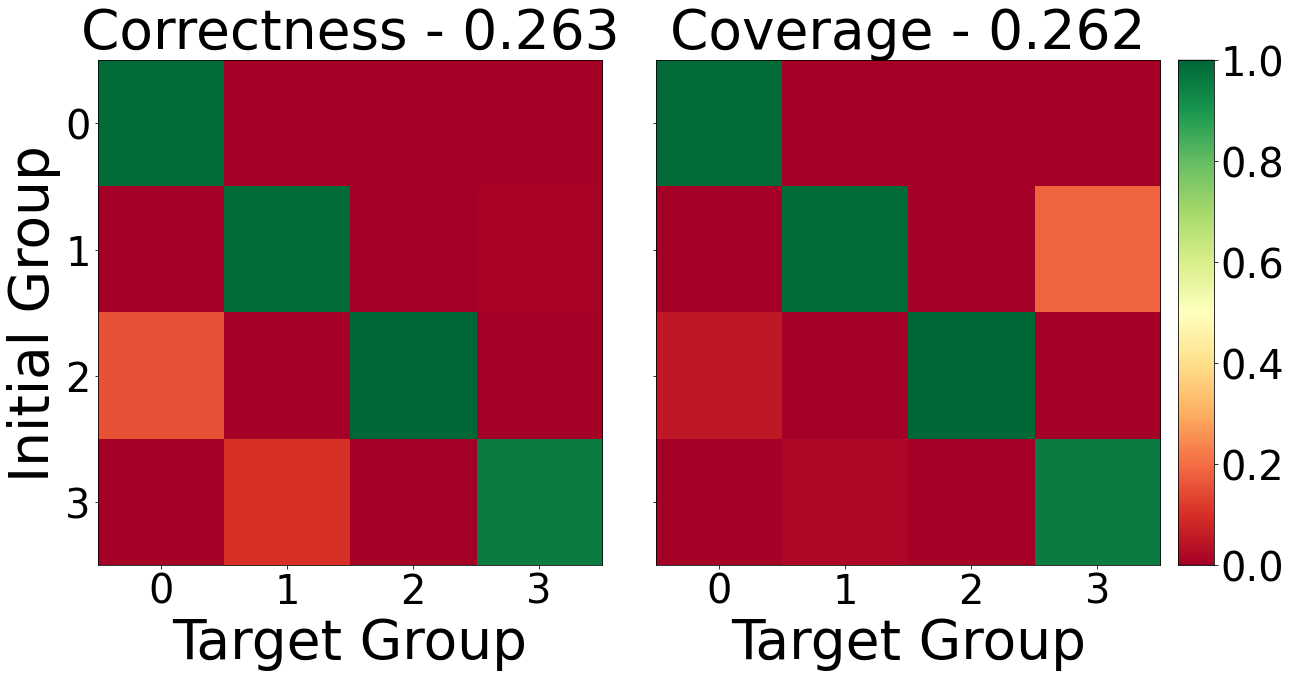

In [22]:
# Evaluate the explanations
deltas = np.load("deltas_with_scaling.npy")
gamma = np.load("gamma.npy")
a, b = Explainer.metrics(torch.tensor(x), indices, torch.from_numpy(deltas), epsilon, logit_gammas=torch.from_numpy(gamma))

plot_metrics(a, b, name = "synth-metrics-scaling.png")